# D208 Predictive Modeling Performance Assessment (NBM4 TASK 2)

By: Josmar Adames, Student ID: 011189889, MSDA

## Part I: Research Question

### A1: Research Question

The research question I will explore within this paper is "What factors affect customer churn with the service provider?" Focusing my research on churn will allow the company to gain insights into future improvements. By finding the variables contributing to churn, the company can pinpoint which aspects of the organization are helpful and harmful. The company then can limit the harmful variables to help improve customer churn.

* Hypothesis
    * No features contribute to customer **churn**
    * The features do contribute to customer **churn**

### A2: Goals

My analysis aims to gain more significant insights into what factors cause customer churn differences within the company. I want to help the service provider by identifying which aspects of the company could use improvement and reduce churn. Customer retainability is enormous in the service provider market. Customers will change their providers for many reasons. Some common reasons are customers are paying too much, or their connection is unstable. In the internet provider domain, customers can switch providers if their providers are not offering quality add-on packages or the internet speed is too slow. Deep diving into the service provider's customer data can help identify if some of these issues are occurring. 

## Part II: Method Justification

### B1: Summary of Assumptions

Based on the information on [Statology](https://www.statology.org/assumptions-of-logistic-regression/), these are six assumptions I will be making while using a Logistic Regression:

* 1: The response variable is binary. <br>
The response (y) variable is impacted by the explanatory (x) variables, but the y variable can only have two states. This generally represents a True/False or Either/Or situation, but a logistic regression must only have two unique values for the y variable.

* 2: The observations are independent. <br>
The observations of each feature should be independent of one another. I can test this by creating a plot of time vs residuals, and if there is a random pattern, then the assumption is not violated.

* 3: There is no multicollinearity among explanatory variables <br>
Similar to the MLR, there must be no multicollinearity between the independent variables. This means that two X variables are highly correlated with one another. To prevent this, I will be using the VIF (Variance Inflation Factor) to lower the multicollinearity within the model.

* 4: There are no Extreme outliers <br>
Having outliers within a regression model tends to skew the results. In order to make our model as accurate as possible, we must deal with the outliers within the features we select. I will be using IQR to limit the values of the outliers.

* 5: There is a linear relationship between explanatory variables and the Logit of the response variable <br>
Logit(p)  = log(p / (1-p)) where p is the probability of a positive outcome.

* 6: The sample size is sufficiently large <br>
This should not be a problem since we are using data that contains 10000 rows.



### B2: Tool Benefit

One benefit of using Python is that it is easy to use third-party modules and libraries. Some of the libraries I will use in this report include pandas, numpy, seaborn, matplotlib, and statsmodels. I will use pandas and numpy to help import/export the data, transform/clean the data, and create a data frame with the variables I will explore further. I will use seaborn and matplotlib for the visualizations of the report. Lastly, I will use statsmodel to run the logistic regression.

Another benefit of using Python is that the language is very versatile. The Python coding language is easy to read, learn, and write. When a mistake is made in Python, the program directs you to the line, causing errors. These features make it easy to debug Python if any issues arise.

### B3: Appropriate Technique

In this Task, I will use **Logistic Regression** to answer my research question. I chose this regression because it is an effective method when the target variable is a binary variable. In my case, the target variable is Churn, which fits the requirement for LR. Logistic regression will allow me to see what independent variables are related to the dependent variable (Churn).



## Part III: Data Preparation

### C1: Data Cleaning

These are my goals for Data Cleaning:
* Finding and dropping duplicates
    * I will use the .duplicated() command from pandas to ensure there is no duplicate data in the CSV.
<br>
<br>
* Finding and replacing missing information (NULLS)
    * I want to replace NULLS in the data to ensure it is well prepared before applying any regression techniques. I want our model to be as accurate as possible, and keeping NULLS within the dataset would throw off our model.
    * I will use .isnull().sum to help detect NULLS. If there are any NULLS present, I will use .fillna() to replace the NULLS values with the mean value of the column
<br>
<br>
* Detecting and resolving outliers
    * To improve the model's accuracy, I will remove any outliers I find.
    * I will only remove outliers from the variables that I will be using and not for the whole dataset.
    * I will use the IQR method to remove outliers. This method will systematically detect and remove outliers surpassing a certain threshold
 <br>
 <br>

In [253]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [254]:
df = pd.read_csv('churn_clean.csv', index_col = 0, keep_default_na = False)
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income                10

In [256]:
df.columns

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [257]:
df[df.duplicated()] # Check for duplicates in the DataFrame

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,


In [258]:
# There are no duplicates within the data

In [259]:
#Checking for Nulls

df.isnull().sum()

Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure      

In [260]:
u_df = df[['Children','Age', 'Income','Churn','Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 
          'Contract', 'InternetService', 'TechSupport','Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

u_df.head() # These are the variables that will be used in the intial model

,Children,Age,Income,Churn,Email,Contacts,Yearly_equip_failure,Techie,Contract,InternetService,TechSupport,Tenure,MonthlyCharge,Bandwidth_GB_Year
CaseOrder,,,,,,,,,,,,,,
1,0,68,28561.99,No,10,0,1,No,One year,Fiber Optic,No,6.795513,172.455519,904.536110
2,1,27,21704.77,Yes,12,0,1,Yes,Month-to-month,Fiber Optic,No,1.156681,242.632554,800.982766
3,4,50,9609.57,No,9,0,1,Yes,Two Year,DSL,No,15.754144,159.947583,2054.706961
4,1,48,18925.23,No,15,2,0,Yes,Two Year,DSL,No,17.087227,119.956840,2164.579412
5,0,83,40074.19,Yes,16,2,1,No,Month-to-month,Fiber Optic,Yes,1.670972,149.948316,271.493436


In [261]:
u_df.columns

Index(['Children', 'Age', 'Income', 'Churn', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'InternetService',
       'TechSupport', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

In [262]:
u_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Income                10000 non-null  float64
 3   Churn                 10000 non-null  object 
 4   Email                 10000 non-null  int64  
 5   Contacts              10000 non-null  int64  
 6   Yearly_equip_failure  10000 non-null  int64  
 7   Techie                10000 non-null  object 
 8   Contract              10000 non-null  object 
 9   InternetService       10000 non-null  object 
 10  TechSupport           10000 non-null  object 
 11  Tenure                10000 non-null  float64
 12  MonthlyCharge         10000 non-null  float64
 13  Bandwidth_GB_Year     10000 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.1+ MB


In [263]:
#Checking for Outliers
for c in u_df.columns:
    if u_df[c].dtype == "O":
        print("There are no outliers for {} since it is a categorical column".format(c))
        print('\n')
        
    else:
        Q1 = u_df[c].quantile(.25)
        Q3 = u_df[c].quantile(.75)
        
        IQR = Q3-Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        
        outliers = u_df[(u_df[c]<lower) | (u_df[c]>upper)]
    

        
        print ("The amount of outliers for {} is {}".format(c,outliers[c].count()))
        print('\n')
        

The amount of outliers for Children is 401


The amount of outliers for Age is 0


The amount of outliers for Income is 336


There are no outliers for Churn since it is a categorical column


The amount of outliers for Email is 38


The amount of outliers for Contacts is 8


The amount of outliers for Yearly_equip_failure is 94


There are no outliers for Techie since it is a categorical column


There are no outliers for Contract since it is a categorical column


There are no outliers for InternetService since it is a categorical column


There are no outliers for TechSupport since it is a categorical column


The amount of outliers for Tenure is 0


The amount of outliers for MonthlyCharge is 0


The amount of outliers for Bandwidth_GB_Year is 0




In [264]:
#Treatment of Outliers (Children, Income, Email, Contacts, Yearly_equip_failure)

for c in u_df.columns:
    if u_df[c].dtype == "O":
        print("No treat needed for  for {} since it is a categorical column".format(c))
        print('\n')
        
    else:
        Q1 = u_df[c].quantile(.25)
        Q3 = u_df[c].quantile(.75)
        
        IQR = Q3-Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        
        u_df[c] = np.where(u_df[c] <lower, lower, u_df[c]);
        u_df[c] = np.where(u_df[c] >upper, upper, u_df[c]);
        
        print("Upper,Lower, IQR for {} is :{}, {}, {}".format(c,upper,lower,IQR))
    


Upper,Lower, IQR for Children is :7.5, -4.5, 3.0
Upper,Lower, IQR for Age is :125.0, -19.0, 36.0
Upper,Lower, IQR for Income is :104278.34875, -31807.46125, 34021.4525
No treat needed for  for Churn since it is a categorical column


Upper,Lower, IQR for Email is :20.0, 4.0, 4.0
Upper,Lower, IQR for Contacts is :5.0, -3.0, 2.0
Upper,Lower, IQR for Yearly_equip_failure is :2.5, -1.5, 1.0
No treat needed for  for Techie since it is a categorical column


No treat needed for  for Contract since it is a categorical column


No treat needed for  for InternetService since it is a categorical column


No treat needed for  for TechSupport since it is a categorical column


Upper,Lower, IQR for Tenure is :141.822947112375, -72.42545852062501, 53.56210140825
Upper,Lower, IQR for MonthlyCharge is :291.867954, 48.84601000000002, 60.75548599999999
Upper,Lower, IQR for Bandwidth_GB_Year is :12110.64718325, -5288.03498675, 4349.6705425


C:\Users\josma\AppData\Local\Temp\ipykernel_289064\2438224740.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u_df[c] = np.where(u_df[c] <lower, lower, u_df[c]);
C:\Users\josma\AppData\Local\Temp\ipykernel_289064\2438224740.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u_df[c] = np.where(u_df[c] >upper, upper, u_df[c]);
C:\Users\josma\AppData\Local\Temp\ipykernel_289064\2438224740.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [265]:
u_df.describe()

,Children,Age,Income,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.038650,53.078400,39005.334061,12.017600,0.993100,0.392300,34.526188,172.624816,3392.341550
std,1.997306,20.698882,25578.172567,3.010016,0.983132,0.612771,26.443063,42.943094,2185.294852
min,0.000000,18.000000,348.670000,4.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,0.000000,35.000000,19224.717500,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,1.000000,53.000000,33170.605000,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,3.000000,71.000000,53246.170000,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,7.500000,89.000000,104278.348750,20.000000,5.000000,2.500000,71.999280,290.160419,7158.981530


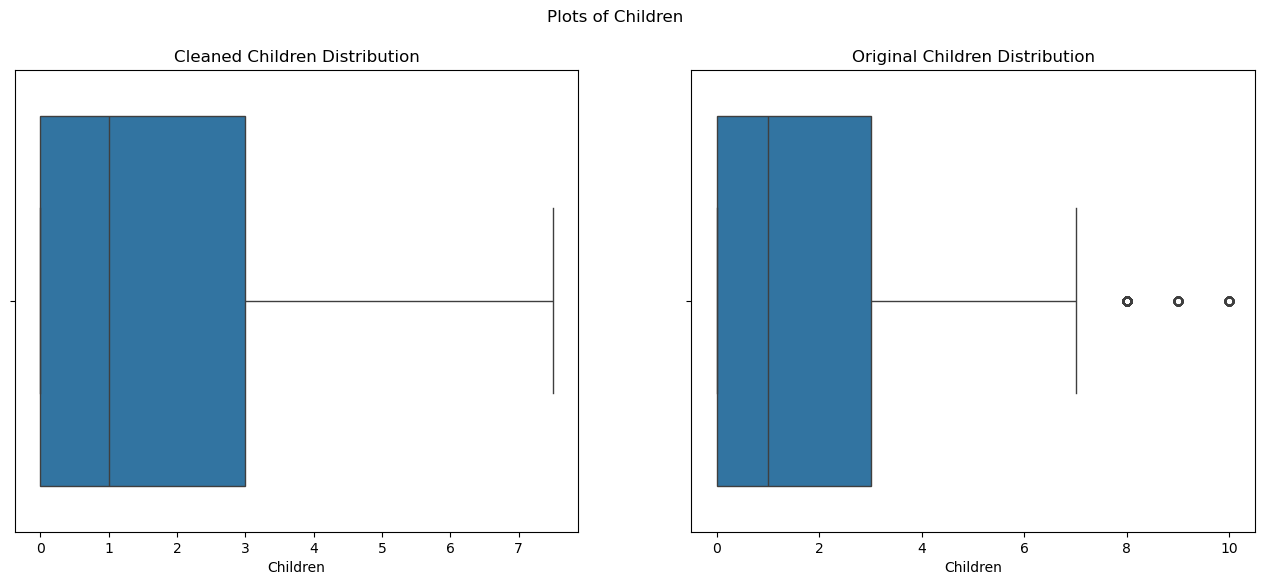

In [266]:
plt.figure(figsize= [16,6])
plt.suptitle("Plots of Children") 

#Clean Plot (Left)
plt.subplot(1,2,1)
plt.title("Cleaned Children Distribution")
sns.boxplot(data=u_df, x='Children');

#Oringinal Plot (Right)
plt.subplot(1,2,2)
plt.title("Original Children Distribution")
sns.boxplot(data=df, x='Children');

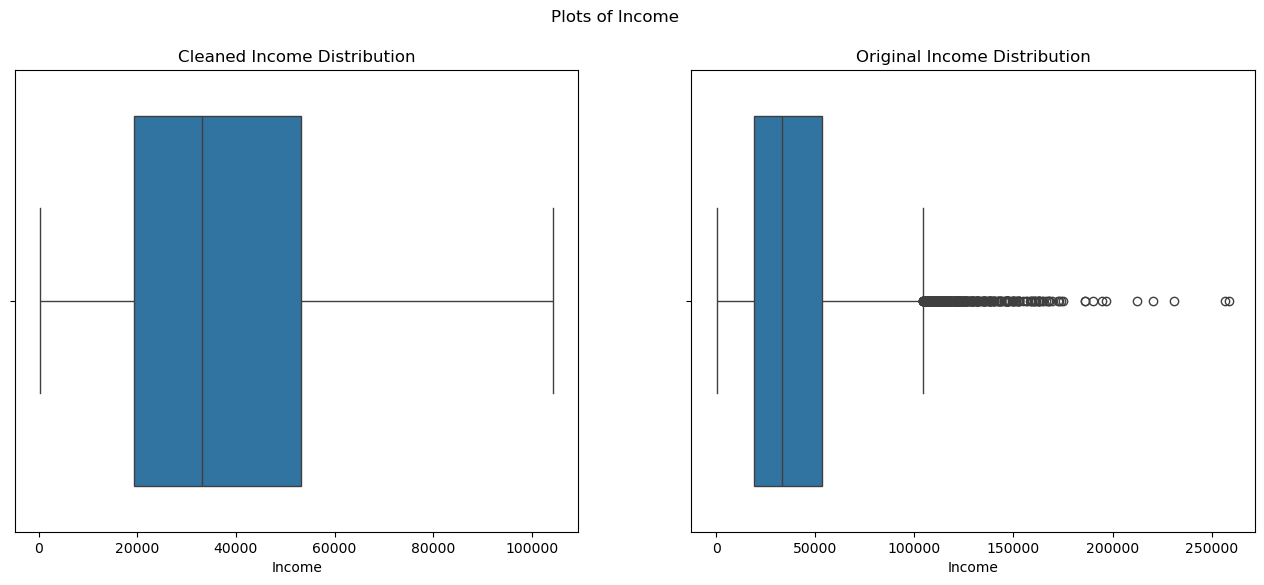

In [267]:
plt.figure(figsize= [16,6])
plt.suptitle("Plots of Income") 

#Clean Plot (Left)
plt.subplot(1,2,1)
plt.title("Cleaned Income Distribution")
sns.boxplot(data=u_df, x='Income');

#Oringinal Plot (Right)
plt.subplot(1,2,2)
plt.title("Original Income Distribution")
sns.boxplot(data=df, x='Income');

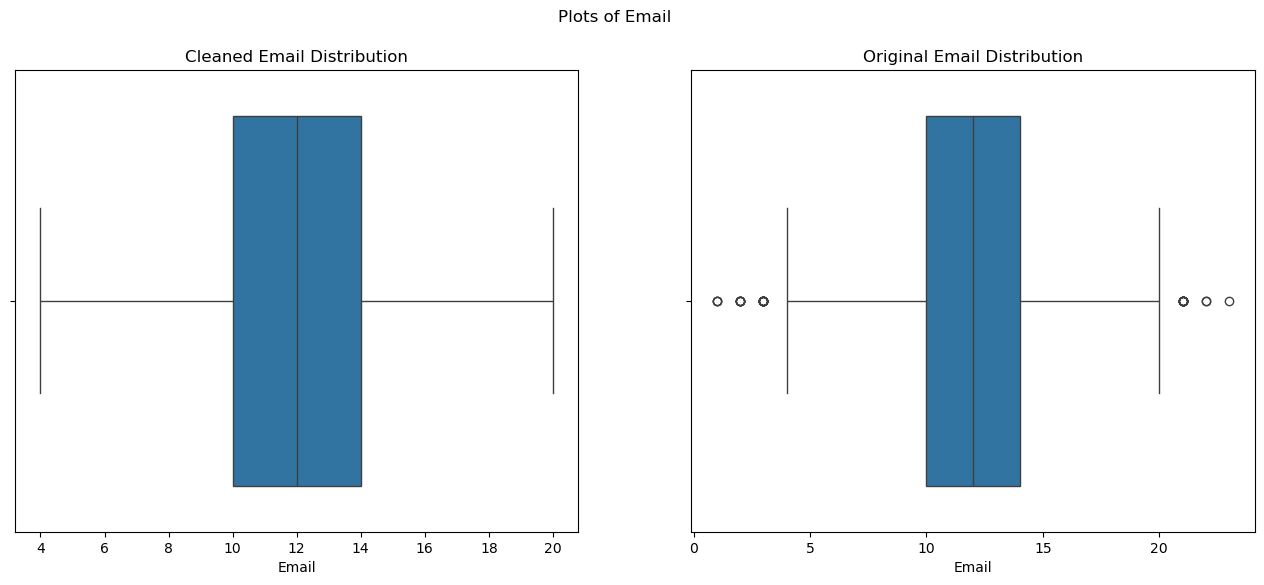

In [268]:
plt.figure(figsize= [16,6])
plt.suptitle("Plots of Email") 

#Clean Plot (Left)
plt.subplot(1,2,1)
plt.title("Cleaned Email Distribution")
sns.boxplot(data=u_df, x='Email');

#Oringinal Plot (Right)
plt.subplot(1,2,2)
plt.title("Original Email Distribution")
sns.boxplot(data=df, x='Email');

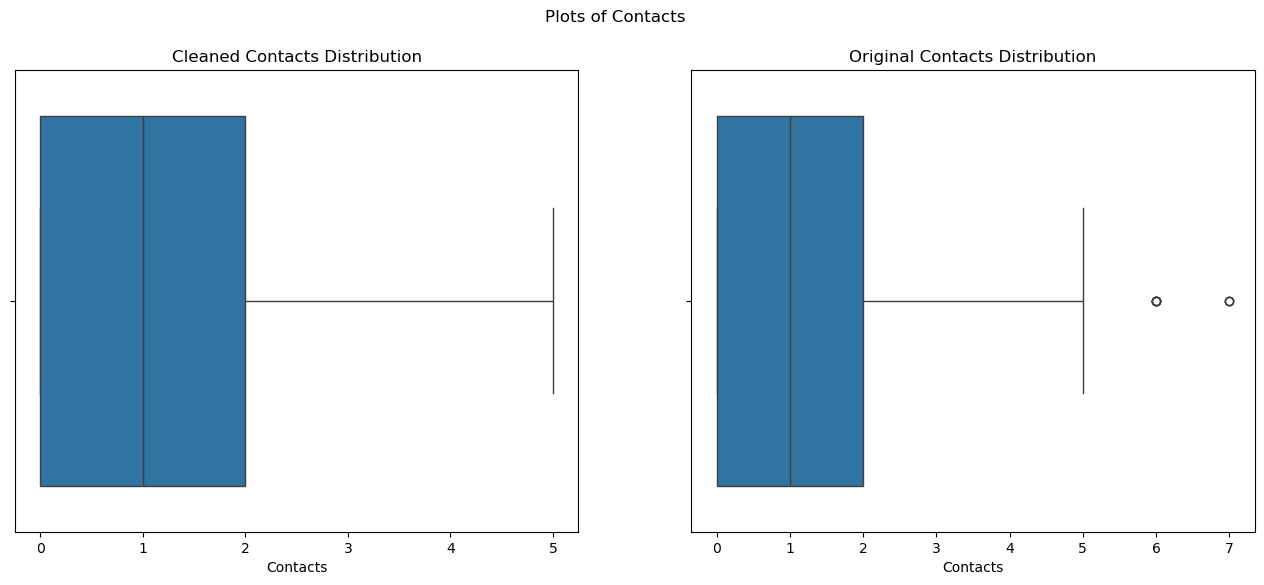

In [269]:
plt.figure(figsize= [16,6])
plt.suptitle("Plots of Contacts") 

#Clean Plot (Left)
plt.subplot(1,2,1)
plt.title("Cleaned Contacts Distribution")
sns.boxplot(data=u_df, x='Contacts');

#Oringinal Plot (Right)
plt.subplot(1,2,2)
plt.title("Original Contacts Distribution")
sns.boxplot(data=df, x='Contacts');

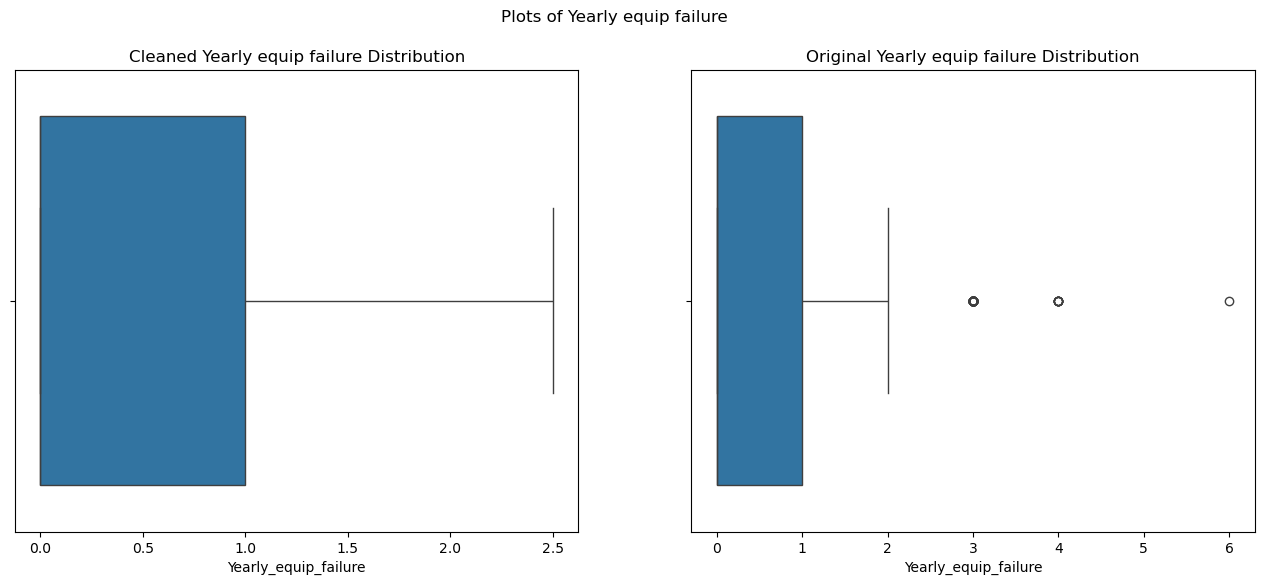

In [270]:
plt.figure(figsize= [16,6])
plt.suptitle("Plots of Yearly equip failure") 

#Clean Plot (Left)
plt.subplot(1,2,1)
plt.title("Cleaned Yearly equip failure Distribution")
sns.boxplot(data=u_df, x='Yearly_equip_failure');

#Oringinal Plot (Right)
plt.subplot(1,2,2)
plt.title("Original Yearly equip failure Distribution")
sns.boxplot(data=df, x='Yearly_equip_failure');

### C2: Summary Statstics

In [272]:
columns = u_df.columns

for z in columns: 
    if u_df[z].dtype == 'O':
        print (z)
        print (u_df[z].value_counts())
        print ('\n')
        
    else:
        print (z)
        print (u_df[z].describe())
        print('\n')
        
    
    

Children
count    10000.000000
mean         2.038650
std          1.997306
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          7.500000
Name: Children, dtype: float64


Age
count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64


Income
count     10000.000000
mean      39005.334061
std       25578.172567
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      104278.348750
Name: Income, dtype: float64


Churn
Churn
No     7350
Yes    2650
Name: count, dtype: int64


Email
count    10000.000000
mean        12.017600
std          3.010016
min          4.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         20.000000
Name: Email, dtype: float64


Contacts
count    10000.000000
mean         0.993100
std          0.983132
m

**Mean** is the sum of all the values of a column divided by the amount of values within the column. For example, if I were looking for the average test score of five students, I would add all the scores and divide that value by five. The **median** is the value in the middle of the column when the column is listed from least to greatest. **Max** is the highest data value within a column. On the other hand, **min** is the lowest value data within a column. Below is a quick statistical summary of all the  variables I will be using: 

* Children 
    * Max: 7.5
    * Min: 0
    * Mean: 2.039
<br>
<br>
* Age 
    * Max: 89
    * Min: 18
    * Mean: 53.078
<br>
<br>
* Income 
    * Max: 104278.39
    * Min: 348.67
    * Mean: 39005.33 
<br>
<br>
* Email 
    * Max: 20
    * Min: 4
    * Mean: 12.018
<br>
<br>
* Contacts 
    * Max: 5
    * Min: 0
    * Mean: 0.993
<br>
<br>
* Yearly_equip_failure 
    * Max: 2.5
    * Min: 0
    * Mean: 0.392300
<br>
<br>
* Tenure 
    * Max: 71.999
    * Min: 1.00
    * Mean: 34.526
<br>
<br>
* MonthlyCharge
    * Max: 290.16
    * Min: 79.979
    * Mean: 172.625
<br>
<br>
* Bandwidth_GB_Year
    * Max: 7158.98
    * Min: 155.507
    * Mean: 3392.342
<br>
<br>
* Churn
    * No - 73.5%
    * Yes - 26.5%
<br>
<br>
* Techie 
    * No - 83.21%
    * Yes - 16.79%
<br>
<br>
* Contract
    * Month-to-month - 54.56%
    * Two Year - 24.42%
    * One Year - 21.02%
<br>
<br>
* InternetService
    * Fiber Optic - 44.08%
    * DSL - 34.63%
    * None -21.29%
<br>
<br>
* TechSupport
    * No - 62.50%
    * Yes - 37.50%

In [274]:
u_df.nunique()

Children                    9
Age                        72
Income                   9658
Churn                       2
Email                      17
Contacts                    6
Yearly_equip_failure        4
Techie                      2
Contract                    3
InternetService             3
TechSupport                 2
Tenure                   9996
MonthlyCharge             750
Bandwidth_GB_Year       10000
dtype: int64

### C3: Visualizations

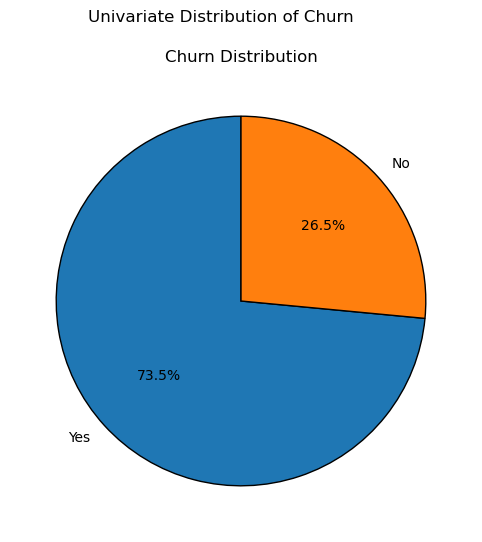

In [412]:
plt.figure(figsize= [16,6])
plt.suptitle("Univariate Distribution of Churn") 
churn_counts = u_df['Churn'].value_counts()
churn_labels = ['Yes', 'No']
plt.pie(churn_counts, labels=churn_labels, startangle=90,  autopct='%1.1f%%', wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title("Churn Distribution");

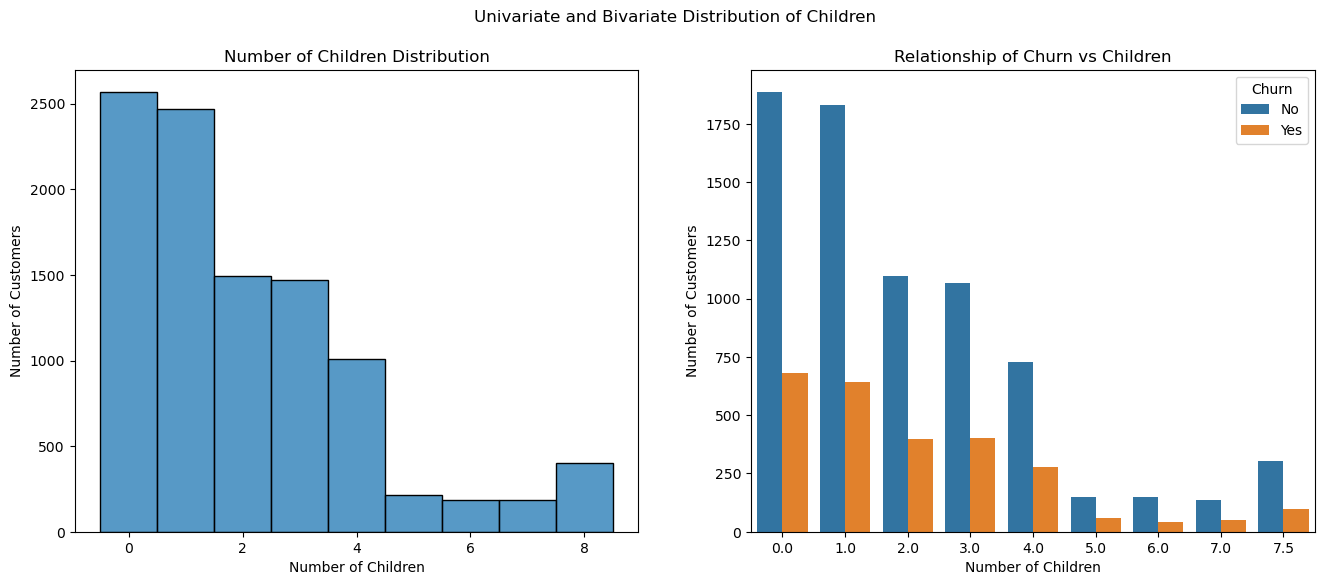

In [277]:
plt.figure(figsize= [16,6])
plt.suptitle("Univariate and Bivariate Distribution of Children") 

#Univariate Plot (Left)

plt.subplot(1,2,1)
plt.title("Number of Children Distribution")
sns.histplot(data=u_df, x='Children',bins='auto', discrete = True)
plt.ylabel("Number of Customers")
plt.xlabel('Number of Children');

#Bivariate Plot (Right)

plt.subplot(1,2,2)
plt.title("Relationship of Churn vs Children")
sns.countplot(data = u_df, x="Children", hue="Churn")
plt.ylabel("Number of Customers")
plt.xlabel('Number of Children');
plt.show()

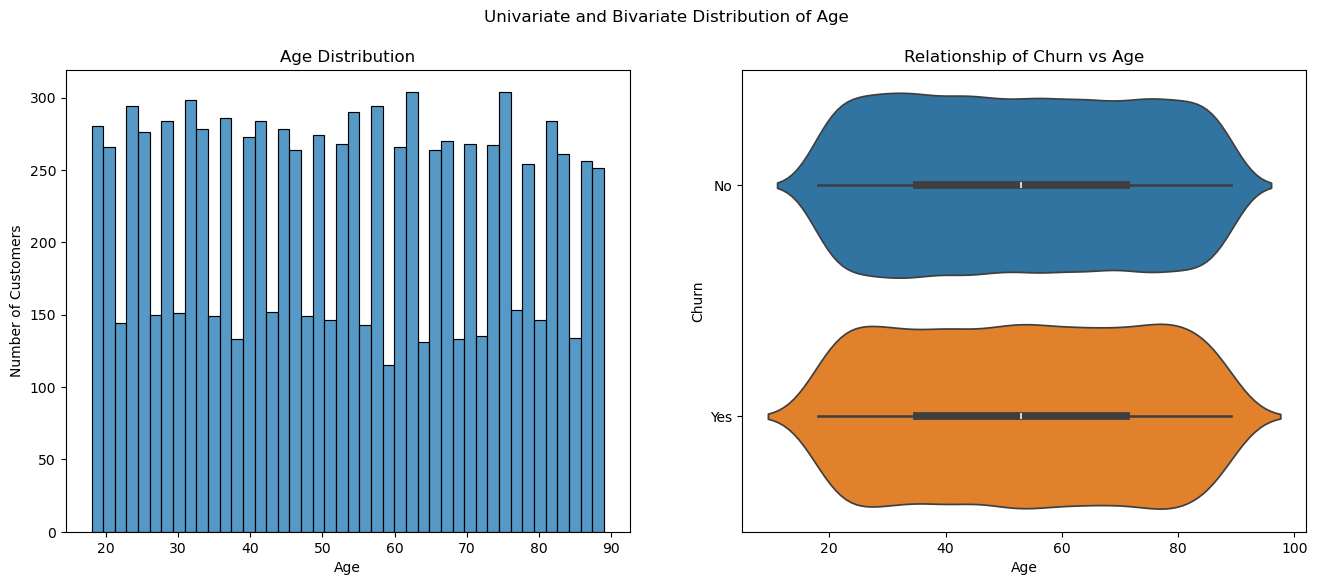

In [278]:
plt.figure(figsize= [16,6])
plt.suptitle("Univariate and Bivariate Distribution of Age") 

#Univariate Plot (Left)

plt.subplot(1,2,1)
plt.title("Age Distribution")
sns.histplot(data=u_df, x='Age', bins='rice')
plt.ylabel("Number of Customers")
plt.xlabel('Age');

#Bivariate Plot (Right)

plt.subplot(1,2,2)
plt.title("Relationship of Churn vs Age")
sns.violinplot(data = u_df, x="Age", y="Churn", hue ='Churn' )
plt.ylabel("Churn")
plt.xlabel('Age');
plt.show()

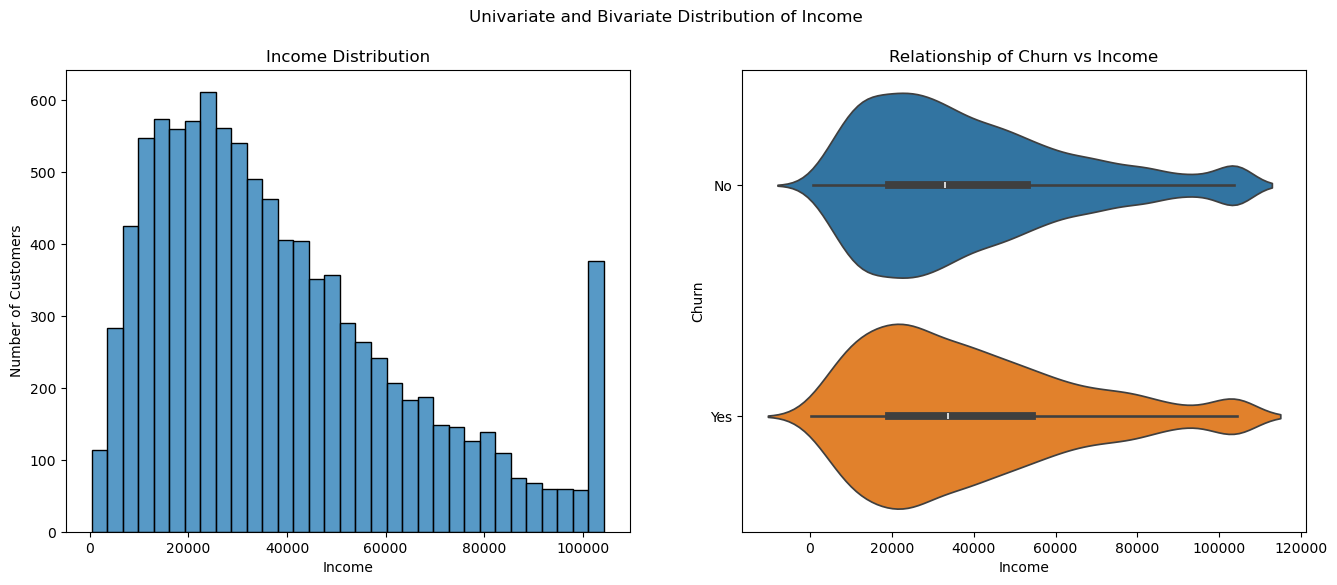

In [279]:
plt.figure(figsize= [16,6])
plt.suptitle("Univariate and Bivariate Distribution of Income") 


#Univariate Plot (Left)

plt.subplot(1,2,1)
plt.title("Income Distribution")
sns.histplot(data=u_df, x='Income',bins='auto')
plt.ylabel("Number of Customers")
plt.xlabel('Income');

#Bivariate Plot (Right)

plt.subplot(1,2,2)
plt.title("Relationship of Churn vs Income")
sns.violinplot(data = u_df, x="Income", y="Churn", hue ='Churn' )
plt.ylabel("Churn")
plt.xlabel('Income');
plt.show()

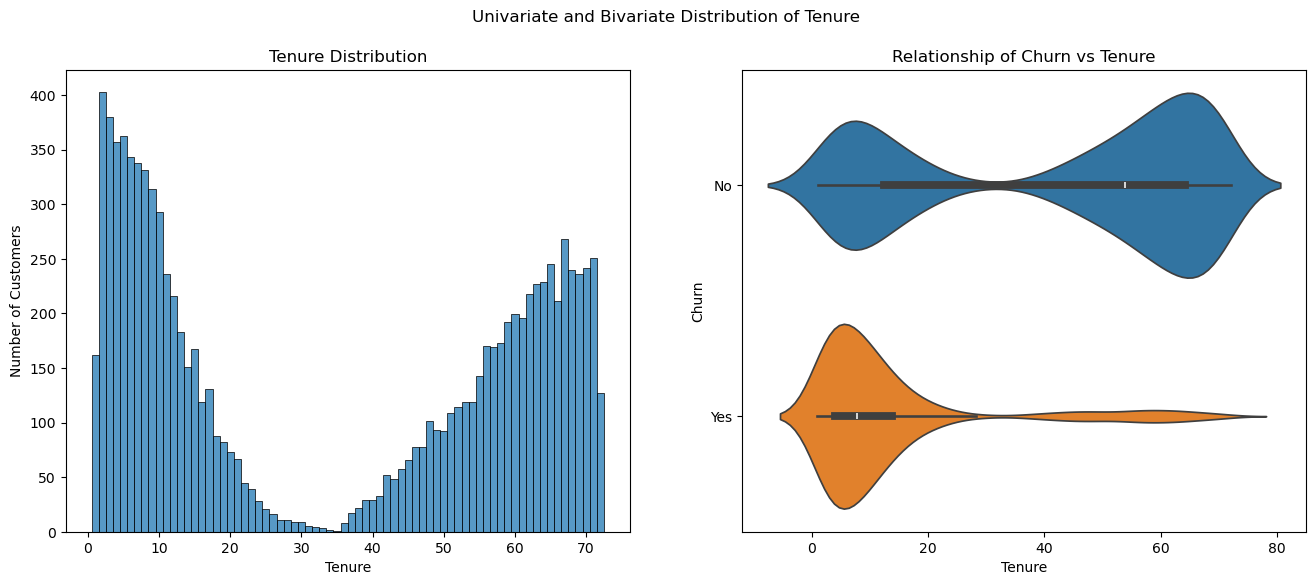

In [280]:
plt.figure(figsize= [16,6])
plt.suptitle("Univariate and Bivariate Distribution of Tenure") 

#Univariate Plot (Left)

plt.subplot(1,2,1)
plt.title("Tenure Distribution")
sns.histplot(data=u_df, x='Tenure', bins= 'auto', discrete = True)
plt.ylabel("Number of Customers")
plt.xlabel('Tenure');

#Bivariate Plot (Right)

plt.subplot(1,2,2)
plt.title("Relationship of Churn vs Tenure")
sns.violinplot(data = u_df, x="Tenure", y="Churn", hue ='Churn' )
plt.ylabel("Churn")
plt.xlabel('Tenure');
plt.show()

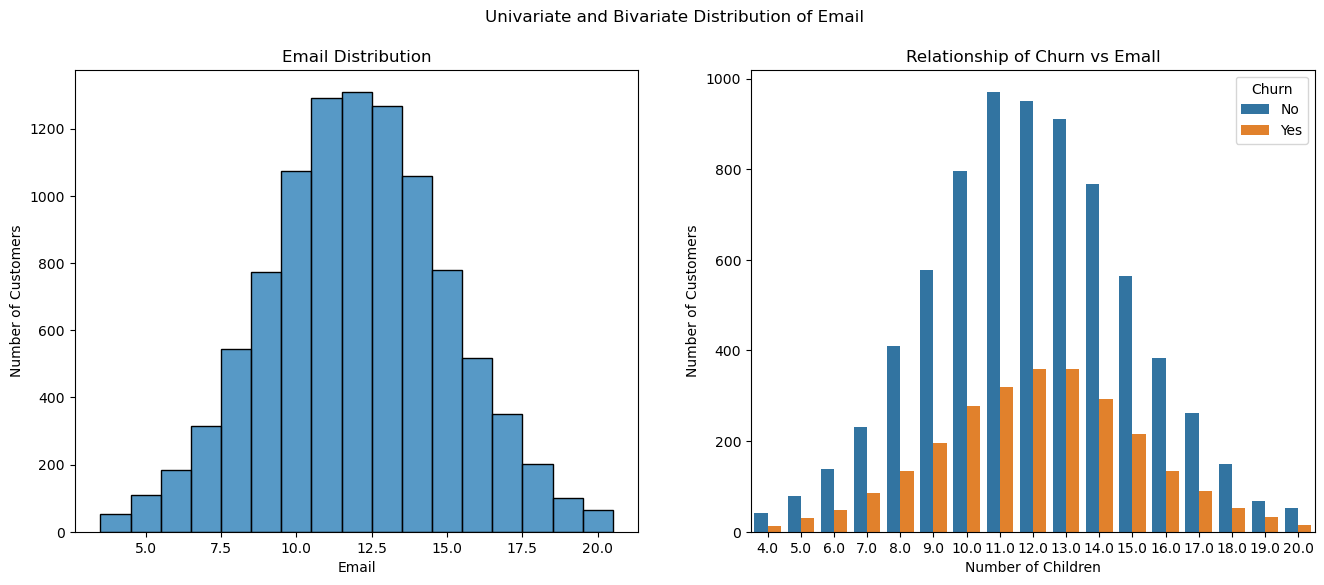

In [281]:
plt.figure(figsize= [16,6])
plt.suptitle("Univariate and Bivariate Distribution of Email") 

#Univariate Plot (Left)

plt.subplot(1,2,1)
plt.title("Email Distribution")
sns.histplot(data=u_df, x='Email',bins='auto', discrete = "True")
plt.ylabel("Number of Customers")
plt.xlabel('Email');

#Bivariate Plot (Right)

plt.subplot(1,2,2)
plt.title("Relationship of Churn vs EmaIl")
sns.countplot(data = u_df, x="Email", hue="Churn")
plt.ylabel("Number of Customers")
plt.xlabel('Number of Children');
plt.show()

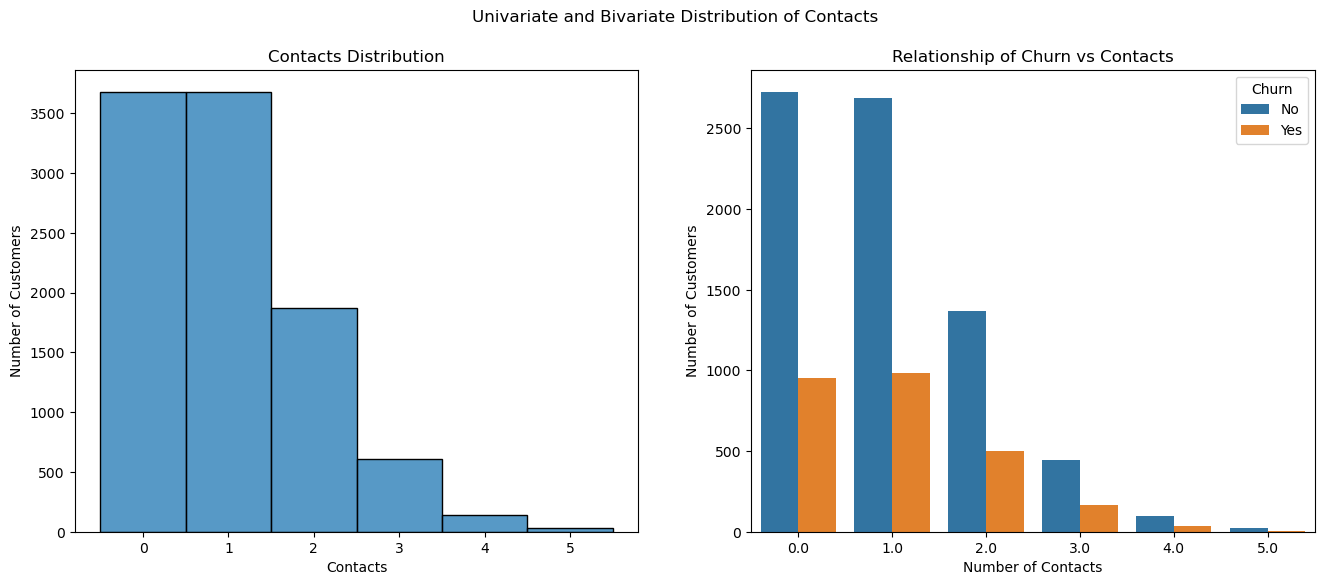

In [282]:
plt.figure(figsize= [16,6])
plt.suptitle("Univariate and Bivariate Distribution of Contacts") 

#Univariate Plot (Left)

plt.subplot(1,2,1)
plt.title("Contacts Distribution")
sns.histplot(data=u_df, x='Contacts',bins = 'auto', discrete = True)
plt.ylabel("Number of Customers")
plt.xlabel('Contacts');

#Bivariate Plot (Right)
plt.subplot(1,2,2)
plt.title("Relationship of Churn vs Contacts")
sns.countplot(data = u_df, x="Contacts", hue="Churn")
plt.ylabel("Number of Customers")
plt.xlabel('Number of Contacts');
plt.show()

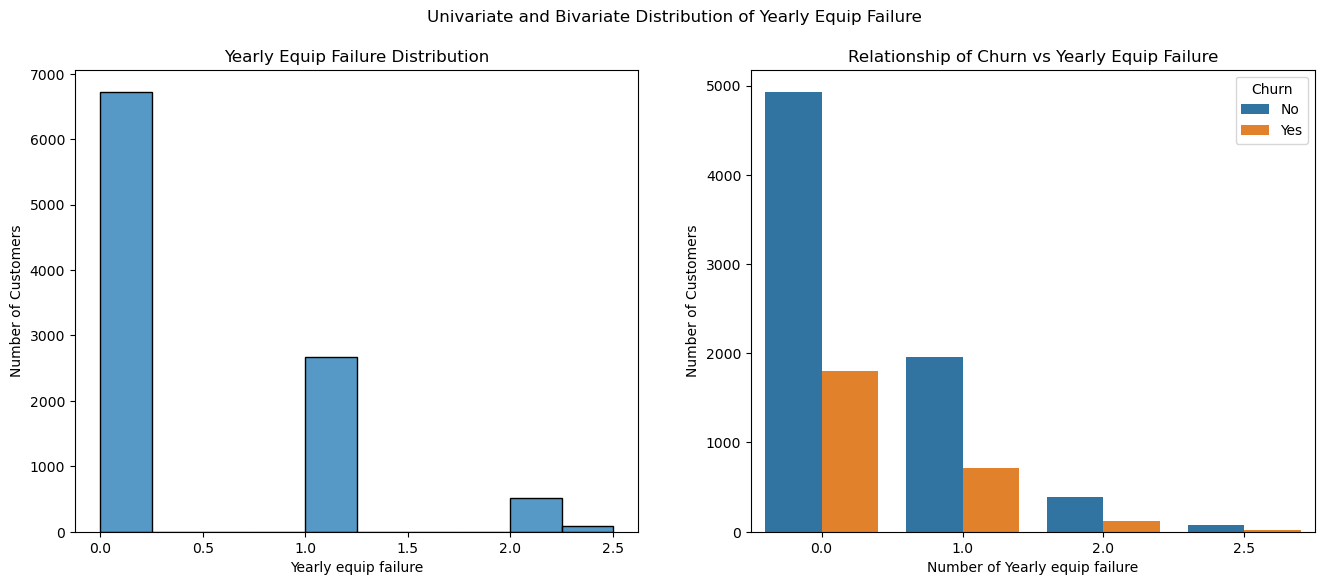

In [283]:
plt.figure(figsize= [16,6])
plt.suptitle("Univariate and Bivariate Distribution of Yearly Equip Failure") 

#Univariate Plot (Left)

plt.subplot(1,2,1)
plt.title("Yearly Equip Failure Distribution")
sns.histplot(data=u_df, x='Yearly_equip_failure',bins=10)
plt.ylabel("Number of Customers")
plt.xlabel('Yearly equip failure');

#Bivariate Plot (Right)

plt.subplot(1,2,2)
plt.title("Relationship of Churn vs Yearly Equip Failure")
sns.countplot(data = u_df, x="Yearly_equip_failure", hue="Churn")
plt.ylabel("Number of Customers")
plt.xlabel('Number of Yearly equip failure');
plt.show()

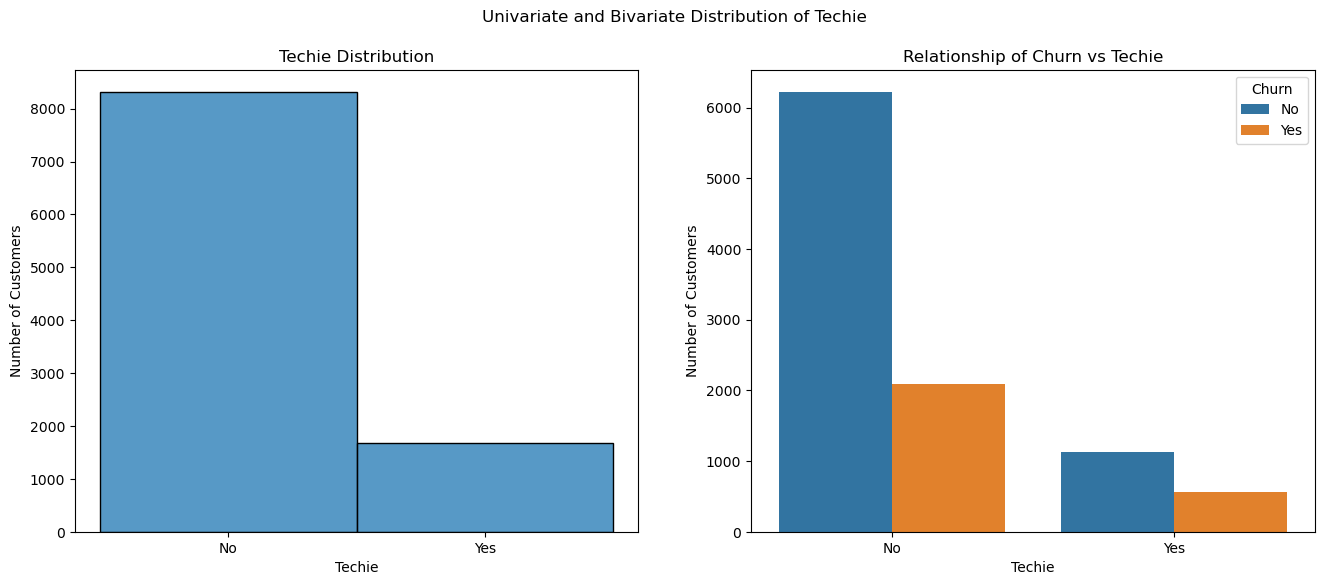

In [284]:
plt.figure(figsize= [16,6])
plt.suptitle("Univariate and Bivariate Distribution of Techie") 

#Univariate Plot (Left)

plt.subplot(1,2,1)
plt.title("Techie Distribution")
sns.histplot(data=u_df, x='Techie',bins='auto')
plt.ylabel("Number of Customers")
plt.xlabel('Techie');

#Bivariate Plot (Right)


plt.subplot(1,2,2)
plt.title("Relationship of Churn vs Techie")
sns.countplot(data = u_df, x="Techie", hue="Churn")
plt.ylabel("Number of Customers")
plt.xlabel('Techie');
plt.show()

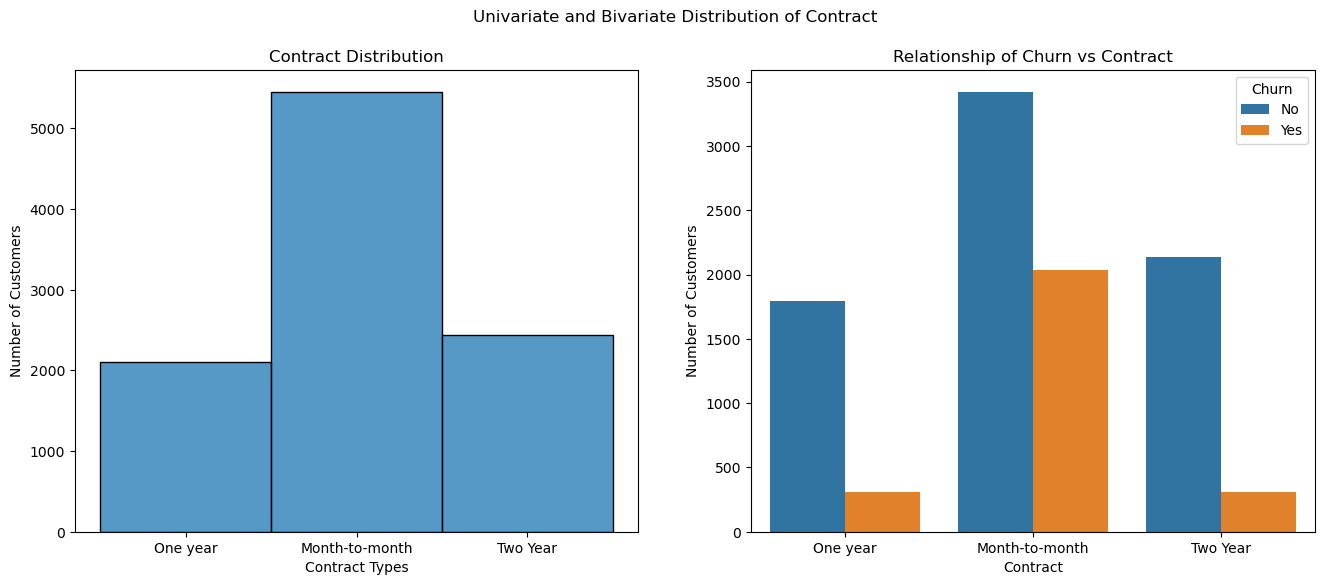

In [285]:
plt.figure(figsize= [16,6])
plt.suptitle("Univariate and Bivariate Distribution of Contract") 

#Univariate Plot (Left)

plt.subplot(1,2,1)
plt.title("Contract Distribution")
sns.histplot(data=u_df, x='Contract',bins='auto')
plt.ylabel("Number of Customers")
plt.xlabel('Contract Types');

#Bivariate Plot (Right)

plt.subplot(1,2,2)
plt.title("Relationship of Churn vs Contract")
sns.countplot(data = u_df, x="Contract", hue="Churn")
plt.ylabel("Number of Customers")
plt.xlabel('Contract');
plt.show()

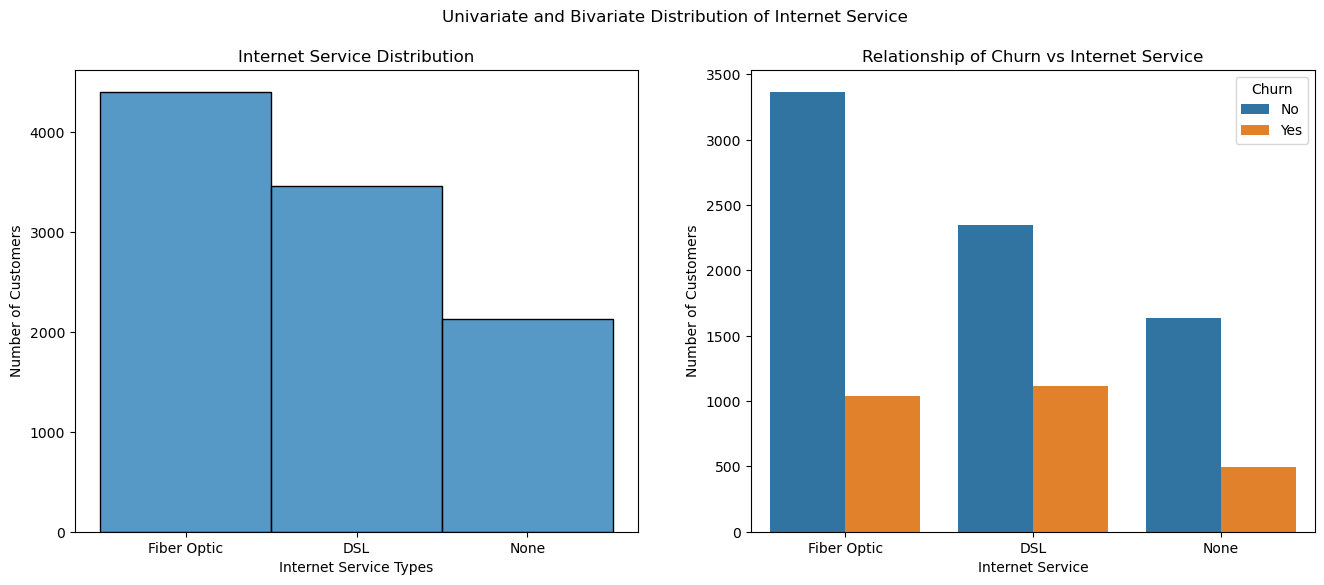

In [286]:
plt.figure(figsize= [16,6])
plt.suptitle("Univariate and Bivariate Distribution of Internet Service") 

#Univariate Plot (Left)

plt.subplot(1,2,1)
plt.title("Internet Service Distribution")
sns.histplot(data=u_df, x='InternetService',bins='auto')
plt.ylabel("Number of Customers")
plt.xlabel('Internet Service Types');

#Bivariate Plot (Right)

plt.subplot(1,2,2)
plt.title("Relationship of Churn vs Internet Service")
sns.countplot(data = u_df, x="InternetService", hue="Churn")
plt.ylabel("Number of Customers")
plt.xlabel('Internet Service');
plt.show()

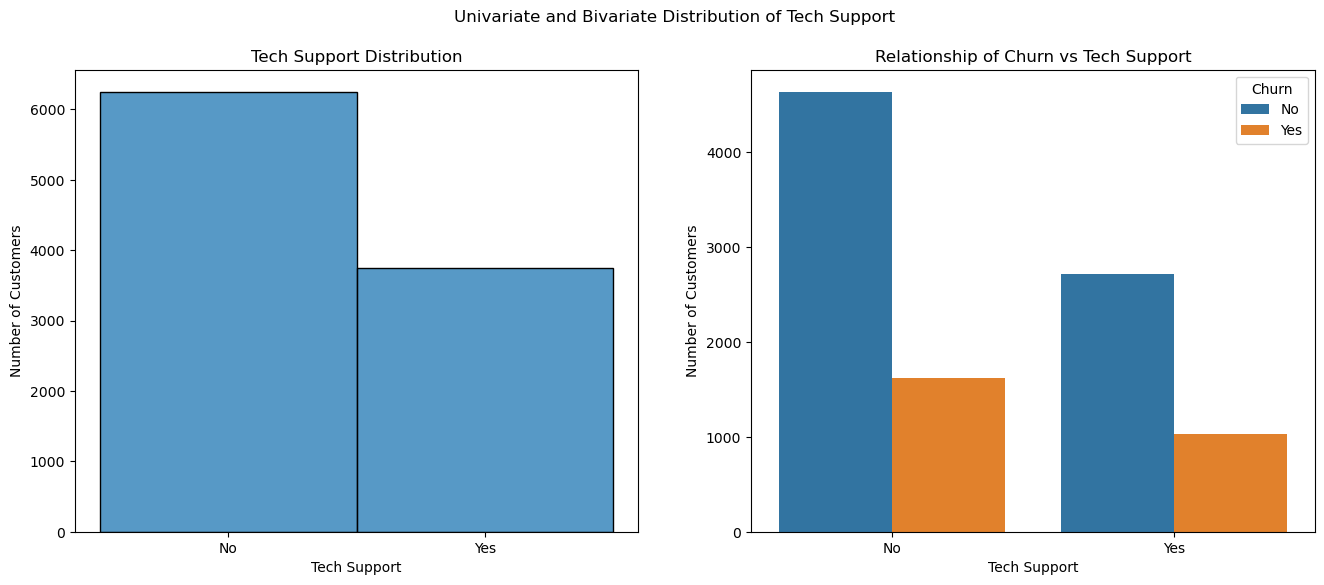

In [287]:
plt.figure(figsize= [16,6])
plt.suptitle("Univariate and Bivariate Distribution of Tech Support") 

#Univariate Plot (Left)

plt.subplot(1,2,1)
plt.title("Tech Support Distribution")
sns.histplot(data=u_df, x='TechSupport',bins='auto')
plt.ylabel("Number of Customers")
plt.xlabel('Tech Support');

#Bivariate Plot (Right)
plt.subplot(1,2,2)
plt.title("Relationship of Churn vs Tech Support")
sns.countplot(data = u_df, x="TechSupport", hue="Churn")
plt.ylabel("Number of Customers")
plt.xlabel('Tech Support');
plt.show()

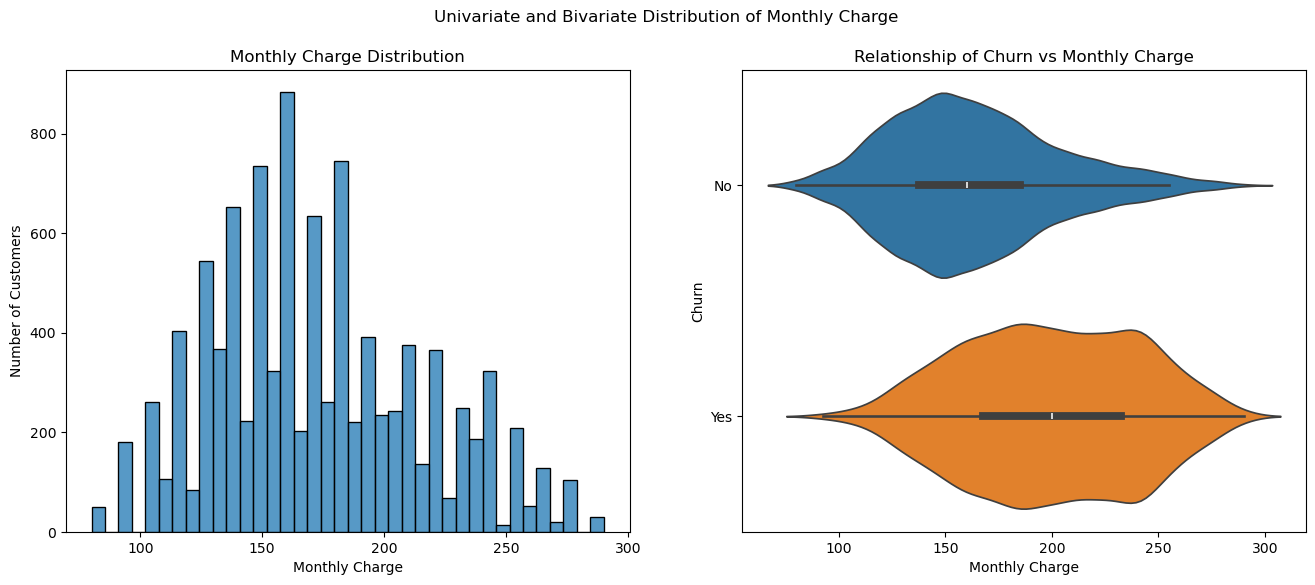

In [288]:
plt.figure(figsize= [16,6])
plt.suptitle("Univariate and Bivariate Distribution of Monthly Charge") 

#Univariate Plot (Left)

plt.subplot(1,2,1)
plt.title("Monthly Charge Distribution")
sns.histplot(data=u_df, x='MonthlyCharge',bins='auto')
plt.ylabel("Number of Customers")
plt.xlabel('Monthly Charge');

#Bivariate Plot (Right)

plt.subplot(1,2,2)
plt.title("Relationship of Churn vs Monthly Charge")
sns.violinplot(data = u_df, x="MonthlyCharge", y="Churn", hue ='Churn' )
plt.ylabel('Churn')
plt.xlabel('Monthly Charge');
plt.show()

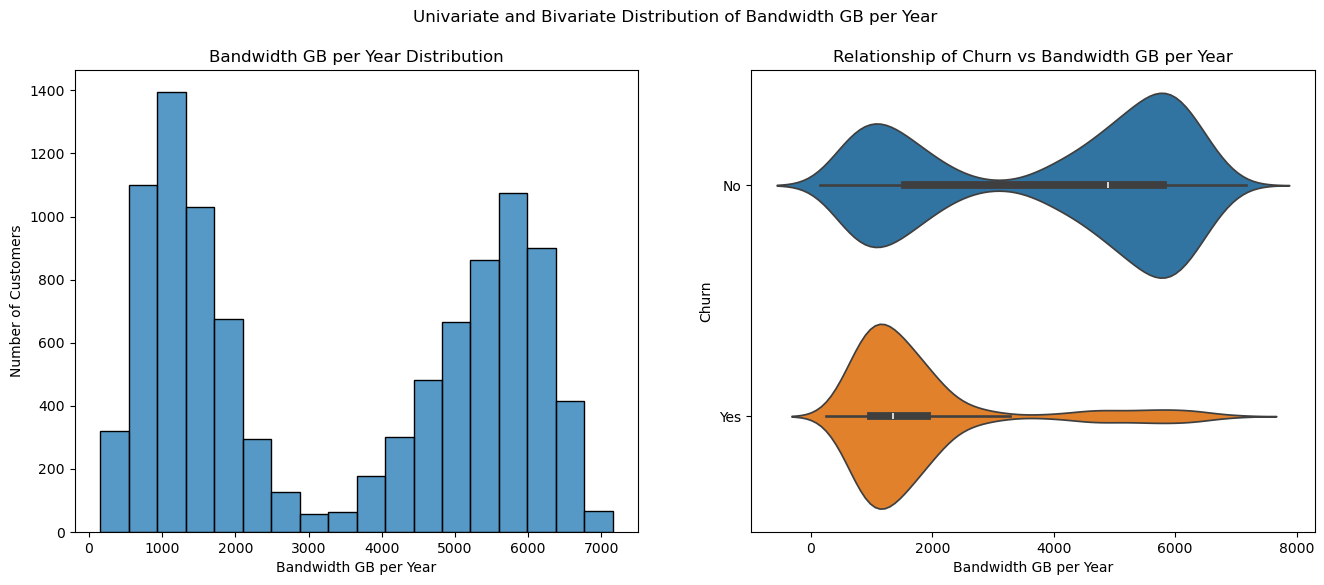

In [289]:
plt.figure(figsize= [16,6])
plt.suptitle("Univariate and Bivariate Distribution of Bandwidth GB per Year") 

#Univariate Plot (Left)

plt.subplot(1,2,1)
plt.title("Bandwidth GB per Year Distribution")
sns.histplot(data=u_df, x='Bandwidth_GB_Year',bins='auto')
plt.ylabel("Number of Customers")
plt.xlabel('Bandwidth GB per Year');

#Bivariate Plot (Right)

plt.subplot(1,2,2)
plt.title("Relationship of Churn vs Bandwidth GB per Year")
sns.violinplot(data = u_df, x="Bandwidth_GB_Year", y="Churn", hue ='Churn' )
plt.ylabel("Churn")
plt.xlabel('Bandwidth GB per Year');
plt.show()

### C4: Data Transformation

In [291]:
df_encoded = pd.get_dummies(u_df, dtype = 'int', drop_first= True) #Used One-Hot encoding to change my variables, dropping one dummy variable from each changed column
df_encoded.rename(columns={"MonthlyCharge":"Monthly_Charge", "InternetService_Fiber Optic":"Internet_Service_Fiber_Optic","InternetService_None" : "Internet_Service_None", 
                           "TechSupport_Yes" : "Tech_Support_Yes", "Contract_One year":"Contract_One_Year", "Contract_Two Year": "Contract_Two_Year",
                           "Yearly_equip_failure":"Yearly_Equip_Failure"},inplace = True)
df_encoded.columns

Index(['Children', 'Age', 'Income', 'Email', 'Contacts',
       'Yearly_Equip_Failure', 'Tenure', 'Monthly_Charge', 'Bandwidth_GB_Year',
       'Churn_Yes', 'Techie_Yes', 'Contract_One_Year', 'Contract_Two_Year',
       'Internet_Service_Fiber_Optic', 'Internet_Service_None',
       'Tech_Support_Yes'],
      dtype='object')

In [292]:
df_encoded.head()

,Children,Age,Income,Email,Contacts,Yearly_Equip_Failure,Tenure,Monthly_Charge,Bandwidth_GB_Year,Churn_Yes,Techie_Yes,Contract_One_Year,Contract_Two_Year,Internet_Service_Fiber_Optic,Internet_Service_None,Tech_Support_Yes
CaseOrder,,,,,,,,,,,,,,,,
1,0.0,68.0,28561.99,10.0,0.0,1.0,6.795513,172.455519,904.536110,0,0,1,0,1,0,0
2,1.0,27.0,21704.77,12.0,0.0,1.0,1.156681,242.632554,800.982766,1,1,0,0,1,0,0
3,4.0,50.0,9609.57,9.0,0.0,1.0,15.754144,159.947583,2054.706961,0,1,0,1,0,0,0
4,1.0,48.0,18925.23,15.0,2.0,0.0,17.087227,119.956840,2164.579412,0,1,0,1,0,0,0
5,0.0,83.0,40074.19,16.0,2.0,1.0,1.670972,149.948316,271.493436,1,0,0,0,1,0,1


In [293]:
df_encoded.info() #This is the DataFrame I will be using to run my initial model

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Children                      10000 non-null  float64
 1   Age                           10000 non-null  float64
 2   Income                        10000 non-null  float64
 3   Email                         10000 non-null  float64
 4   Contacts                      10000 non-null  float64
 5   Yearly_Equip_Failure          10000 non-null  float64
 6   Tenure                        10000 non-null  float64
 7   Monthly_Charge                10000 non-null  float64
 8   Bandwidth_GB_Year             10000 non-null  float64
 9   Churn_Yes                     10000 non-null  int32  
 10  Techie_Yes                    10000 non-null  int32  
 11  Contract_One_Year             10000 non-null  int32  
 12  Contract_Two_Year             10000 non-null  int32  
 13  Intern

I did not make many changes to the Data Frame regarding data transformation. I restructured the columns to be in Pascal Case and replaced all the spaces with underscores. I did this by using .rename() and focused on the columns that were in the wrong format. Additionally, I used one-hot encoding to transform the category variables to dummy variables with the pandas command .get_dummies. Using this method will allow the categorical variables to be included in the regression model. I also dropped one of the dummy variables' columns for each category variable **(k-1 amount of variables)**.

### C5: Prepared Data Set

In [296]:
df_encoded.to_csv('D208_prepared_churn.csv',index = False)

## Part IV: Model Comparison and Analysis

### D1: Initial Model

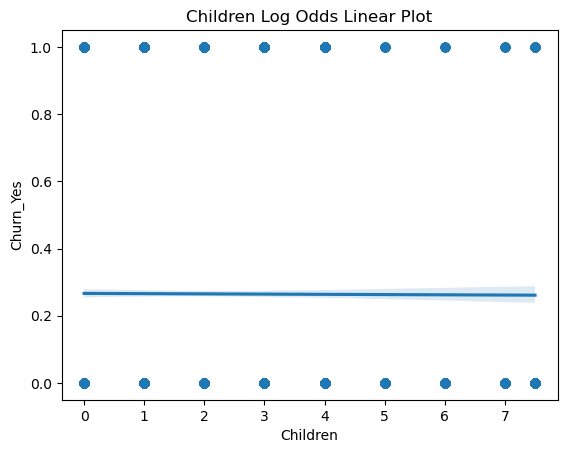

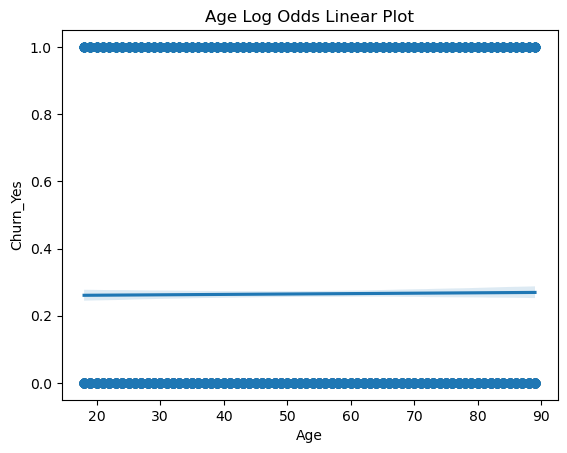

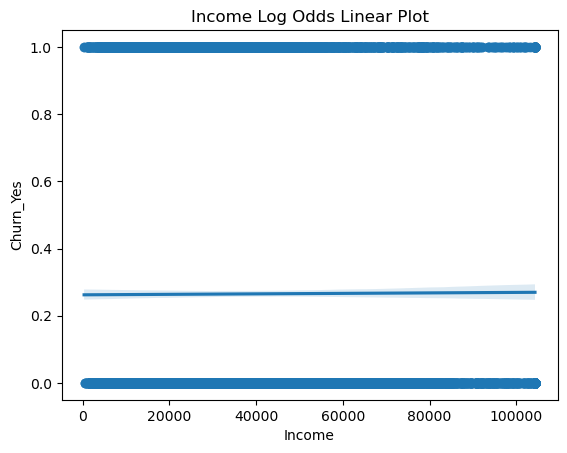

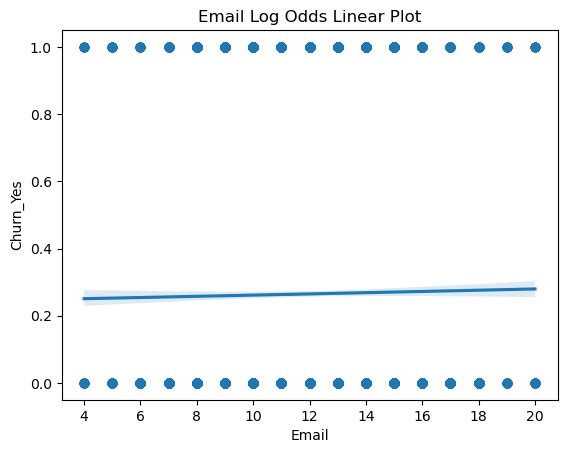

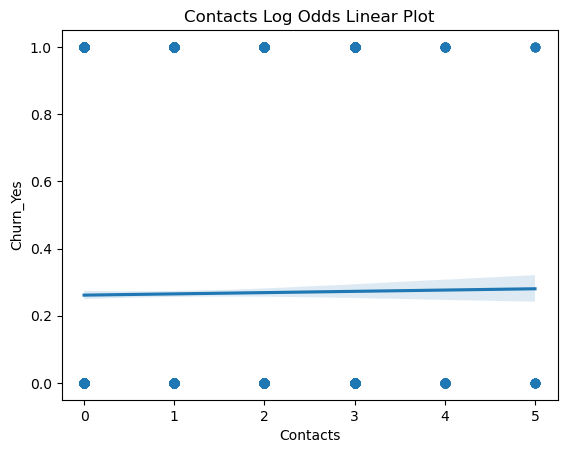

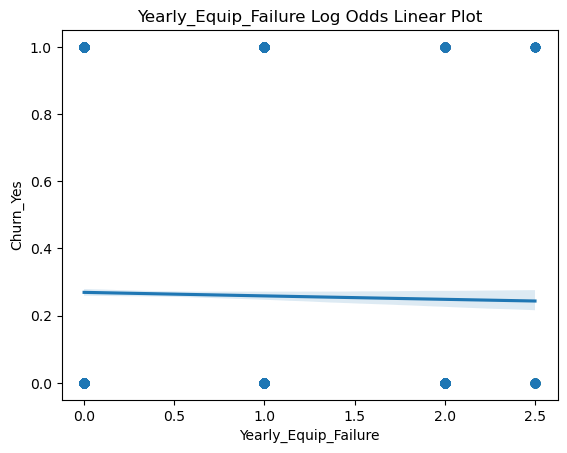

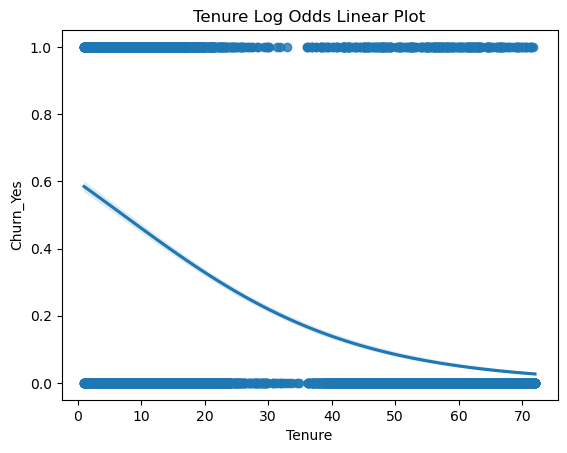

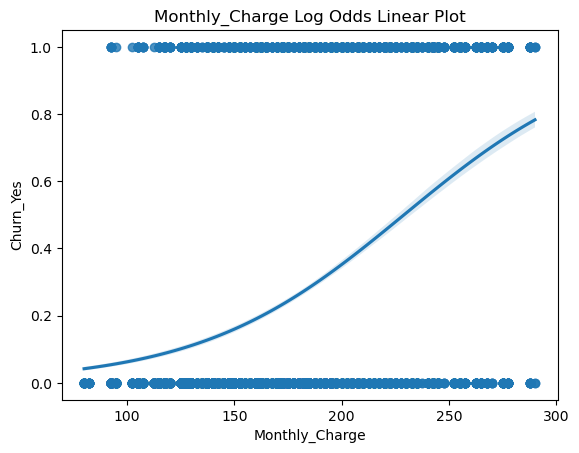

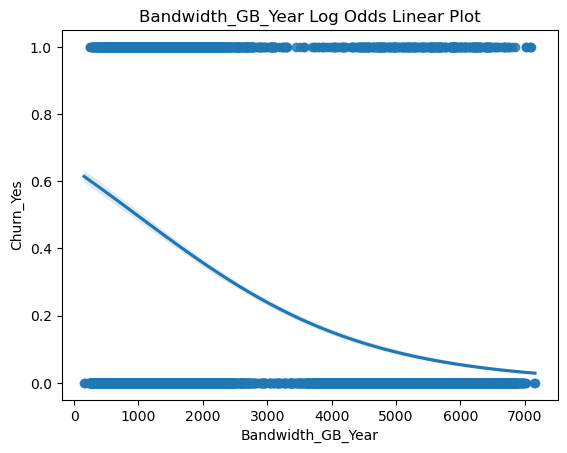

In [299]:
#Testing Assumption #5
X = df_encoded[['Children', 'Age', 'Income', 'Email', 'Contacts', 'Yearly_Equip_Failure', 'Tenure', 'Monthly_Charge' ,'Bandwidth_GB_Year']]
for x in X.columns:
    if x == 'Churn_Yes':
        
        pass
    else:
        sns.regplot(x= x, y= 'Churn_Yes', data= df_encoded, logistic= True).set_title("{} Log Odds Linear Plot".format(x));
        plt.show()

In [300]:
X = df_encoded[['Children', 'Age', 'Income','Email', 'Contacts', 'Yearly_Equip_Failure','Monthly_Charge', 'Bandwidth_GB_Year', 'Tenure', 'Techie_Yes', 'Contract_One_Year', 'Contract_Two_Year', 'Internet_Service_Fiber_Optic', 'Internet_Service_None', 'Tech_Support_Yes']]
y = df_encoded[['Churn_Yes']]

#Fitting model with intercept
X = sm.add_constant(X)
model_i=sm.Logit(y,X).fit()
model_i.summary()

Optimization terminated successfully.
         Current function value: 0.227501
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Tue, 11 Feb 2025   Pseudo R-squ.:                  0.6066
Time:                        16:58:52   Log-Likelihood:                -2275.0
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -6.9006      0.330    -20.936      0.000      -7.547      -6.255
Children                        -0.0348      0.027     -1.286      0.198      -0.088       0.018
Age                              0.0058      0.003      2.205      0.027       0.001       0.011
Income                         2.45e-07   1.47e-06      0.166      0.868   -2.64e-06    3.13e-06
Email                           -0.0052      0.012     -0.417      0.677      -0.030       0.019
Contacts                         0.0549      0.038      1.441      0.150      -0.020       0.129
Yearly_Equip_Failure            -0.0174      0.061     -0.285      0.775      -0.137       0.102
Monthly_Charge                   0.0508      0.003     18.651      0.000       0.045       0.056
Bandwidth_GB_Year                0.0016      0.001      2.886      0.004       0.001       0.003
Tenure                          -0.2466      0.047     -5.251      0.000      -0.339      -0.155
Techie_Yes                       1.0216      0.099     10.274      0.000       0.827       1.216
Contract_One_Year               -3.2816      0.124    -26.551      0.000      -3.524      -3.039
Contract_Two_Year               -3.3478      0.121    -27.693      0.000      -3.585      -3.111
Internet_Service_Fiber_Optic    -1.6467      0.296     -5.569      0.000      -2.226      -1.067
Internet_Service_None           -0.0292      0.228     -0.128      0.898      -0.477       0.418
Tech_Support_Yes                -0.3883      0.083     -4.694      0.000      -0.550      -0.226
================================================================================================
"""

In [301]:
X.shape, y.shape

((10000, 16), (10000, 1))

### D2: Justification of Model Reduction

I need to check and reduce multicollinearity within the dataset and will be using the Variance Inflation Factor (VIF). After running the VIF, if any of the columns have a VIF greater than 5, I will drop that column from the df_encoded data frame and rerun the VIF until all variables are under five. After I lower the multicollinearity, I will use Backwards Stepwise Elimination as a feature selection method. I will iterate through several Logistic regression models, removing the feature with the highest P value until all the features have a P value less than .05. I am implementing all of these steps to make sure the assumptions listed in B1 remain true and to fit my model better.

In [304]:
X = df_encoded[['Children', 'Age', 'Income','Email', 'Contacts', 'Yearly_Equip_Failure','Monthly_Charge', 'Bandwidth_GB_Year', 'Tenure', 'Techie_Yes', 'Contract_One_Year', 'Contract_Two_Year', 'Internet_Service_Fiber_Optic', 'Internet_Service_None', 'Tech_Support_Yes']]
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                         feature          VIF
0                       Children     3.828326
1                            Age    10.503804
2                         Income     3.191472
3                          Email    12.792527
4                       Contacts     1.997589
5           Yearly_Equip_Failure     1.399766
6                 Monthly_Charge   132.929540
7              Bandwidth_GB_Year  2799.977175
8                         Tenure  2199.663239
9                     Techie_Yes     1.197221
10             Contract_One_Year     1.377022
11             Contract_Two_Year     1.439032
12  Internet_Service_Fiber_Optic    20.665894
13         Internet_Service_None     5.710499
14              Tech_Support_Yes     1.766323


In [305]:
#Test 2: Dropped Bandwidth_GB_Year(VIF  =2799.977175); Rerunning test to see if any VIF still above 5
X = df_encoded[['Children', 'Age', 'Income','Email', 'Contacts', 'Yearly_Equip_Failure','Monthly_Charge', 'Tenure', 'Techie_Yes', 'Contract_One_Year', 'Contract_Two_Year', 'Internet_Service_Fiber_Optic', 'Internet_Service_None', 'Tech_Support_Yes']]
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_df)

                         feature        VIF
0                       Children   1.997785
1                            Age   6.636561
2                         Income   3.161261
3                          Email  11.455419
4                       Contacts   1.983422
5           Yearly_Equip_Failure   1.397464
6                 Monthly_Charge  13.118456
7                         Tenure   2.610605
8                     Techie_Yes   1.196009
9              Contract_One_Year   1.374078
10             Contract_Two_Year   1.434481
11  Internet_Service_Fiber_Optic   2.371437
12         Internet_Service_None   1.559533
13              Tech_Support_Yes   1.631461


In [306]:
#Test 3: Dropped Monthly_Charge(VIF  =13.118456); Rerunning test to see if any VIF still above 5
X = df_encoded[['Children', 'Age', 'Income','Email', 'Contacts', 'Yearly_Equip_Failure', 'Tenure', 'Techie_Yes', 'Contract_One_Year', 'Contract_Two_Year', 'Internet_Service_Fiber_Optic', 'Internet_Service_None', 'Tech_Support_Yes']]
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_df)

                         feature       VIF
0                       Children  1.978154
1                            Age  6.140370
2                         Income  3.084675
3                          Email  8.872868
4                       Contacts  1.963398
5           Yearly_Equip_Failure  1.392289
6                         Tenure  2.567435
7                     Techie_Yes  1.192071
8              Contract_One_Year  1.362678
9              Contract_Two_Year  1.426046
10  Internet_Service_Fiber_Optic  2.156968
11         Internet_Service_None  1.559519
12              Tech_Support_Yes  1.581405


In [307]:
#Test 4: Dropped Email (VIF  = 8.872868); Rerunning test to see if any VIF still above 5
X = df_encoded[['Children', 'Age', 'Income', 'Contacts', 'Yearly_Equip_Failure', 'Tenure', 'Techie_Yes', 'Contract_One_Year', 'Contract_Two_Year', 'Internet_Service_Fiber_Optic', 'Internet_Service_None', 'Tech_Support_Yes']]
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_df)

                         feature       VIF
0                       Children  1.912536
1                            Age  4.800866
2                         Income  2.880384
3                       Contacts  1.905453
4           Yearly_Equip_Failure  1.381273
5                         Tenure  2.460697
6                     Techie_Yes  1.186308
7              Contract_One_Year  1.346726
8              Contract_Two_Year  1.404797
9   Internet_Service_Fiber_Optic  2.044526
10         Internet_Service_None  1.507925
11              Tech_Support_Yes  1.548861


After running VIF three times, I eliminated the multiconllinearity within the variables. No other variables are above 5 in the VIF test.

In [309]:
# Use the Backwards Stepwise Elimination to drop variables with P values > .05 
X = df_encoded[['Children', 'Age', 'Income', 'Contacts', 'Yearly_Equip_Failure', 'Tenure', 'Techie_Yes', 'Contract_One_Year', 'Contract_Two_Year', 'Internet_Service_Fiber_Optic', 'Internet_Service_None', 'Tech_Support_Yes']]
y = df_encoded[['Churn_Yes']]

#Fitting model with intercept
X = sm.add_constant(X)
model=sm.Logit(y,X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.385028
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Tue, 11 Feb 2025   Pseudo R-squ.:                  0.3341
Time:                        16:58:52   Log-Likelihood:                -3850.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.4917      0.118     12.589      0.000       1.259       1.724
Children                         0.0067      0.014      0.467      0.641      -0.021       0.035
Age                              0.0015      0.001      1.065      0.287      -0.001       0.004
Income                        8.366e-08   1.11e-06      0.075      0.940   -2.09e-06    2.26e-06
Contacts                         0.0359      0.029      1.242      0.214      -0.021       0.092
Yearly_Equip_Failure            -0.0292      0.047     -0.626      0.531      -0.121       0.062
Tenure                          -0.0627      0.001    -42.077      0.000      -0.066      -0.060
Techie_Yes                       0.5450      0.074      7.368      0.000       0.400       0.690
Contract_One_Year               -1.7459      0.079    -22.136      0.000      -1.900      -1.591
Contract_Two_Year               -1.8729      0.078    -24.165      0.000      -2.025      -1.721
Internet_Service_Fiber_Optic    -0.7431      0.065    -11.456      0.000      -0.870      -0.616
Internet_Service_None           -0.7772      0.079     -9.813      0.000      -0.932      -0.622
Tech_Support_Yes                 0.0918      0.059      1.564      0.118      -0.023       0.207
================================================================================================
"""

In [310]:
# Removed Income (P = 0.940); Rerunning test to see if any variables have a P value > .05
X = df_encoded[['Children', 'Age','Contacts', 'Yearly_Equip_Failure', 'Tenure', 'Techie_Yes', 'Contract_One_Year', 'Contract_Two_Year', 'Internet_Service_Fiber_Optic', 'Internet_Service_None', 'Tech_Support_Yes']]
y = df_encoded[['Churn_Yes']]

#Fitting model with intercept
X = sm.add_constant(X)
model=sm.Logit(y,X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.385028
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Tue, 11 Feb 2025   Pseudo R-squ.:                  0.3341
Time:                        16:58:52   Log-Likelihood:                -3850.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.4950      0.110     13.644      0.000       1.280       1.710
Children                         0.0067      0.014      0.468      0.640      -0.021       0.035
Age                              0.0015      0.001      1.064      0.287      -0.001       0.004
Contacts                         0.0359      0.029      1.241      0.214      -0.021       0.092
Yearly_Equip_Failure            -0.0292      0.047     -0.626      0.531      -0.121       0.062
Tenure                          -0.0627      0.001    -42.077      0.000      -0.066      -0.060
Techie_Yes                       0.5450      0.074      7.368      0.000       0.400       0.690
Contract_One_Year               -1.7459      0.079    -22.136      0.000      -1.900      -1.591
Contract_Two_Year               -1.8730      0.078    -24.168      0.000      -2.025      -1.721
Internet_Service_Fiber_Optic    -0.7432      0.065    -11.461      0.000      -0.870      -0.616
Internet_Service_None           -0.7773      0.079     -9.816      0.000      -0.933      -0.622
Tech_Support_Yes                 0.0918      0.059      1.565      0.118      -0.023       0.207
================================================================================================
"""

In [311]:
# Removed Children (P = 0.640); Rerunning test to see if any variables have a P value > .05
X = df_encoded[['Age','Contacts', 'Yearly_Equip_Failure', 'Tenure', 'Techie_Yes', 'Contract_One_Year', 'Contract_Two_Year', 'Internet_Service_Fiber_Optic', 'Internet_Service_None', 'Tech_Support_Yes']]
y = df_encoded[['Churn_Yes']]

#Fitting model with intercept
X = sm.add_constant(X)
model=sm.Logit(y,X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.385039
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Tue, 11 Feb 2025   Pseudo R-squ.:                  0.3341
Time:                        16:58:53   Log-Likelihood:                -3850.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.5092      0.105     14.323      0.000       1.303       1.716
Age                              0.0015      0.001      1.057      0.290      -0.001       0.004
Contacts                         0.0355      0.029      1.231      0.218      -0.021       0.092
Yearly_Equip_Failure            -0.0289      0.047     -0.620      0.535      -0.120       0.062
Tenure                          -0.0627      0.001    -42.079      0.000      -0.066      -0.060
Techie_Yes                       0.5441      0.074      7.358      0.000       0.399       0.689
Contract_One_Year               -1.7456      0.079    -22.134      0.000      -1.900      -1.591
Contract_Two_Year               -1.8721      0.077    -24.165      0.000      -2.024      -1.720
Internet_Service_Fiber_Optic    -0.7431      0.065    -11.459      0.000      -0.870      -0.616
Internet_Service_None           -0.7769      0.079     -9.812      0.000      -0.932      -0.622
Tech_Support_Yes                 0.0918      0.059      1.565      0.118      -0.023       0.207
================================================================================================
"""

In [312]:
# Removed Yearly_Equip_Failure (P = 0.535); Rerunning test to see if any variables have a P value > .05
X = df_encoded[['Age','Contacts', 'Tenure', 'Techie_Yes', 'Contract_One_Year', 'Contract_Two_Year', 'Internet_Service_Fiber_Optic', 'Internet_Service_None', 'Tech_Support_Yes']]
y = df_encoded[['Churn_Yes']]

#Fitting model with intercept
X = sm.add_constant(X)
model=sm.Logit(y,X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.385058
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Tue, 11 Feb 2025   Pseudo R-squ.:                  0.3341
Time:                        16:58:53   Log-Likelihood:                -3850.6
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.4990      0.104     14.404      0.000       1.295       1.703
Age                              0.0014      0.001      1.051      0.293      -0.001       0.004
Contacts                         0.0355      0.029      1.230      0.219      -0.021       0.092
Tenure                          -0.0628      0.001    -42.086      0.000      -0.066      -0.060
Techie_Yes                       0.5448      0.074      7.367      0.000       0.400       0.690
Contract_One_Year               -1.7463      0.079    -22.144      0.000      -1.901      -1.592
Contract_Two_Year               -1.8722      0.077    -24.167      0.000      -2.024      -1.720
Internet_Service_Fiber_Optic    -0.7432      0.065    -11.461      0.000      -0.870      -0.616
Internet_Service_None           -0.7771      0.079     -9.814      0.000      -0.932      -0.622
Tech_Support_Yes                 0.0909      0.059      1.551      0.121      -0.024       0.206
================================================================================================
"""

In [313]:
# Removed Age (P = 0.293); Rerunning test to see if any variables have a P value > .05
X = df_encoded[['Contacts','Tenure', 'Techie_Yes', 'Contract_One_Year', 'Contract_Two_Year', 'Internet_Service_Fiber_Optic', 'Internet_Service_None', 'Tech_Support_Yes']]
y = df_encoded[['Churn_Yes']]

#Fitting model with intercept
X = sm.add_constant(X)
model=sm.Logit(y,X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.385113
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Tue, 11 Feb 2025   Pseudo R-squ.:                  0.3340
Time:                        16:58:53   Log-Likelihood:                -3851.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.5746      0.075     20.868      0.000       1.427       1.722
Contacts                         0.0362      0.029      1.253      0.210      -0.020       0.093
Tenure                          -0.0627      0.001    -42.081      0.000      -0.066      -0.060
Techie_Yes                       0.5436      0.074      7.353      0.000       0.399       0.689
Contract_One_Year               -1.7479      0.079    -22.165      0.000      -1.902      -1.593
Contract_Two_Year               -1.8731      0.077    -24.182      0.000      -2.025      -1.721
Internet_Service_Fiber_Optic    -0.7428      0.065    -11.456      0.000      -0.870      -0.616
Internet_Service_None           -0.7765      0.079     -9.809      0.000      -0.932      -0.621
Tech_Support_Yes                 0.0923      0.059      1.574      0.115      -0.023       0.207
================================================================================================
"""

In [314]:
# Removed Contacts (P = 0.210); Rerunning test to see if any variables have a P value > .05
X = df_encoded[['Tenure', 'Techie_Yes', 'Contract_One_Year', 'Contract_Two_Year', 'Internet_Service_Fiber_Optic', 'Internet_Service_None', 'Tech_Support_Yes']]
y = df_encoded[['Churn_Yes']]

#Fitting model with intercept
X = sm.add_constant(X)
model=sm.Logit(y,X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.385192
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Tue, 11 Feb 2025   Pseudo R-squ.:                  0.3338
Time:                        16:58:53   Log-Likelihood:                -3851.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.6106      0.070     23.054      0.000       1.474       1.748
Tenure                          -0.0627      0.001    -42.079      0.000      -0.066      -0.060
Techie_Yes                       0.5445      0.074      7.364      0.000       0.400       0.689
Contract_One_Year               -1.7460      0.079    -22.152      0.000      -1.901      -1.592
Contract_Two_Year               -1.8727      0.077    -24.180      0.000      -2.025      -1.721
Internet_Service_Fiber_Optic    -0.7437      0.065    -11.472      0.000      -0.871      -0.617
Internet_Service_None           -0.7779      0.079     -9.829      0.000      -0.933      -0.623
Tech_Support_Yes                 0.0915      0.059      1.561      0.118      -0.023       0.206
================================================================================================
"""

In [315]:
# Removed Tech_Support_Yes (P = 0.0.118); Rerunning test to see if any variables have a P value > .05
X = df_encoded[['Tenure', 'Techie_Yes', 'Contract_One_Year', 'Contract_Two_Year', 'Internet_Service_Fiber_Optic', 'Internet_Service_None']]
y = df_encoded[['Churn_Yes']]

#Fitting model with intercept
X = sm.add_constant(X)
model=sm.Logit(y,X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.385313
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Tue, 11 Feb 2025   Pseudo R-squ.:                  0.3336
Time:                        16:58:53   Log-Likelihood:                -3853.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.6463      0.066     24.893      0.000       1.517       1.776
Tenure                          -0.0627      0.001    -42.079      0.000      -0.066      -0.060
Techie_Yes                       0.5446      0.074      7.368      0.000       0.400       0.689
Contract_One_Year               -1.7459      0.079    -22.158      0.000      -1.900      -1.592
Contract_Two_Year               -1.8727      0.077    -24.184      0.000      -2.024      -1.721
Internet_Service_Fiber_Optic    -0.7462      0.065    -11.515      0.000      -0.873      -0.619
Internet_Service_None           -0.7793      0.079     -9.847      0.000      -0.934      -0.624
================================================================================================
"""

### D3: Reduced Model

The variables Bandwidth_GB_Year, Monthly_Charge, and Email were removed due to multicollinearity. Additionally, Contacts, Yearly_Equip_Failure, Income, Tech_Support_Yes, Children, and Age were eliminated due to having high p-values. Below are the variables that have the highest impact on Churn from the list of variables I started with: 
 * Tenure
 * Techie_Yes
 * Contract_One_Year
 * Contract_Two_Year
 * Internet_Service_Fiber_Optic
 * Internet_Service_None
   
   
 

In [318]:
# Assigning the final model 

X = df_encoded[['Tenure', 'Techie_Yes', 'Contract_One_Year', 'Contract_Two_Year', 'Internet_Service_Fiber_Optic', 'Internet_Service_None']]
y = df_encoded[['Churn_Yes']]

#Fitting model with intercept
X = sm.add_constant(X)
model_f=sm.Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: 0.385313
         Iterations 7


In [319]:
X.shape, y.shape

((10000, 7), (10000, 1))

###  E1: Model Comparison

In [321]:
model_i.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Tue, 11 Feb 2025   Pseudo R-squ.:                  0.6066
Time:                        16:58:53   Log-Likelihood:                -2275.0
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -6.9006      0.330    -20.936      0.000      -7.547      -6.255
Children                        -0.0348      0.027     -1.286      0.198      -0.088       0.018
Age                              0.0058      0.003      2.205      0.027       0.001       0.011
Income                         2.45e-07   1.47e-06      0.166      0.868   -2.64e-06    3.13e-06
Email                           -0.0052      0.012     -0.417      0.677      -0.030       0.019
Contacts                         0.0549      0.038      1.441      0.150      -0.020       0.129
Yearly_Equip_Failure            -0.0174      0.061     -0.285      0.775      -0.137       0.102
Monthly_Charge                   0.0508      0.003     18.651      0.000       0.045       0.056
Bandwidth_GB_Year                0.0016      0.001      2.886      0.004       0.001       0.003
Tenure                          -0.2466      0.047     -5.251      0.000      -0.339      -0.155
Techie_Yes                       1.0216      0.099     10.274      0.000       0.827       1.216
Contract_One_Year               -3.2816      0.124    -26.551      0.000      -3.524      -3.039
Contract_Two_Year               -3.3478      0.121    -27.693      0.000      -3.585      -3.111
Internet_Service_Fiber_Optic    -1.6467      0.296     -5.569      0.000      -2.226      -1.067
Internet_Service_None           -0.0292      0.228     -0.128      0.898      -0.477       0.418
Tech_Support_Yes                -0.3883      0.083     -4.694      0.000      -0.550      -0.226
================================================================================================
"""

In [322]:
model_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Tue, 11 Feb 2025   Pseudo R-squ.:                  0.3336
Time:                        16:58:53   Log-Likelihood:                -3853.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.6463      0.066     24.893      0.000       1.517       1.776
Tenure                          -0.0627      0.001    -42.079      0.000      -0.066      -0.060
Techie_Yes                       0.5446      0.074      7.368      0.000       0.400       0.689
Contract_One_Year               -1.7459      0.079    -22.158      0.000      -1.900      -1.592
Contract_Two_Year               -1.8727      0.077    -24.184      0.000      -2.024      -1.721
Internet_Service_Fiber_Optic    -0.7462      0.065    -11.515      0.000      -0.873      -0.619
Internet_Service_None           -0.7793      0.079     -9.847      0.000      -0.934      -0.624
================================================================================================
"""

In [323]:
model_f.aic

7720.267465017969

In [324]:
model_i.aic

4582.018762852314

My initial model contains 15 variables, while my final model was reduced to six. While performing VIF to lower multicollinearity, I removed four features (Bandwidth_GB_Year, Monthly_Charge, Email). Then, to keep statistically significant variables (P-value<.05), I removed four additional features (Contacts, Yearly_Equip_Failure, Income, Tech_Support_Yes, Children, and Age) utilizing Backwards Stepwise Elimination. Even though my reduced model had fewer variables and only those features were statistically significant, my initial model performed better in comparison. When comparing my models' summary, I found that my initial model had better values in Adjusted R-squared. Looking at Adjusted R-squared, my initial model has an AIC of 4582.02, while my final reduced model has a value of 7720.27. My initial model offers a better fit for Churn  than my final model. 

### E2: Output and Calculations

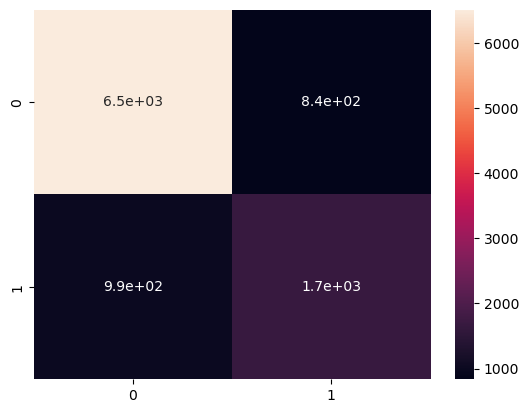

[[6515.  835.]
 [ 992. 1658.]]
The accuracy of the model is: 0.8173


In [327]:
#Confusion Matrix 

matrix = model_f.pred_table()
sns.heatmap(matrix, annot=True);
plt.show()

TP, TN, FP, FN = matrix[0,0], matrix[1,1], matrix[1,0], matrix[0,1]
accuracy = (TP+TN)/(TP+TN+FP+FN)
print(matrix)
print("The accuracy of the model is: {}".format(accuracy))

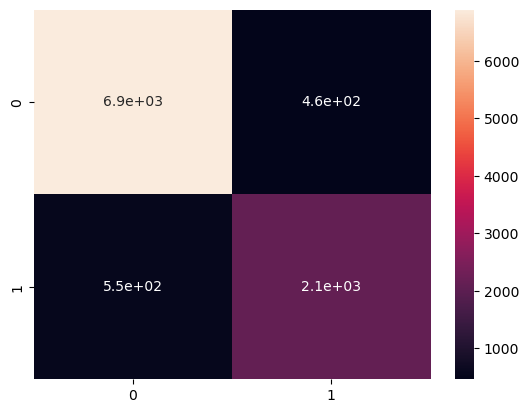

[[6887.  463.]
 [ 546. 2104.]]
The accuracy of the model is: 0.8991


In [328]:

matrix = model_i.pred_table()
sns.heatmap(matrix, annot=True);
plt.show()

TP, TN, FP, FN = matrix[0,0], matrix[1,1], matrix[1,0], matrix[0,1]
accuracy = (TP+TN)/(TP+TN+FP+FN)
print(matrix)
print("The accuracy of the model is: {}".format(accuracy))

### E3: Code

Please look at code attached

## Part V: Data Summary and Implications

### F1: Results

In [332]:
model_f.params

const                           1.646325
Tenure                         -0.062712
Techie_Yes                      0.544565
Contract_One_Year              -1.745939
Contract_Two_Year              -1.872683
Internet_Service_Fiber_Optic   -0.746194
Internet_Service_None          -0.779259
dtype: float64

In [333]:
odds_ratio=np.exp(model_f.params)
print(odds_ratio)

const                           5.187880
Tenure                          0.939214
Techie_Yes                      1.723858
Contract_One_Year               0.174481
Contract_Two_Year               0.153711
Internet_Service_Fiber_Optic    0.474168
Internet_Service_None           0.458746
dtype: float64


In [334]:
#Turning into a percentage
for x in odds_ratio.index:
    if odds_ratio[x] < 1:
        p=(1-odds_ratio[x]) * 100
        print( 'The percentage for {} is: {}'.format(x,p))
    else:
        print ('No calculation needed')

No calculation needed
The percentage for Tenure is: 6.0786464538446054
No calculation needed
The percentage for Contract_One_Year is: 82.55189459266548
The percentage for Contract_Two_Year is: 84.62893062013362
The percentage for Internet_Service_Fiber_Optic is: 52.583212396047095
The percentage for Internet_Service_None is: 54.12543206216007


ln(p/(1-p)) = 1.6463 - 0.0627(Tenure) + 0.5446(Techie_Yes) - 1.7459(Contract_One_Year) - 1.8727(Contract_Two_Year) - 0.7462(Internet_Service_Fiber_Optic) - 0.7793(Internet_Service_None)

* Y-intercept is 1.6463
* Keeping all things constant, one unit increase in Tenure is associated with a 6.08% smaller relative chance of the customer churning.
* Keeping all things constant, one unit increase in Techie_Yes is associated with a 72.4% larger relative chance of a customer (who is a Techie) churning than a customer who is not a Techie
* Keeping all things constant, one unit increase in Contract_One_Year is associated with an 82.55% smaller relative chance of a customer (who is on a one-year contract) churning than a customer on a DSL contract. 
* Keeping all things constant, one unit increase in Contract_Two_Year is associated with an 84.63% smaller relative chance of a customer (who is on a two-year contract) churning than a customer on a month-to-month contract. 
* Keeping all things constant, one unit increase in Internet_Service_Fiber_Optic is associated with a 52.58% smaller relative chance of a customer (who has a Fiber Optic Internet service) churning than a customer on a DSL Internet service contract. 
* Keeping all things constant, one unit increase in Internet_Service_None is associated with a 54.13% smaller relative chance of a customer (who has no Internet service) churning than a customer on a DSL Internet service contract. 

My model is significant from a statistical perspective because the LLR-p-value is 0.00. Since this value is less than 0.05, the model's results are significant and not by random chance. Also, my reduced model only contains independent variables statistically significant to Churn. My model is also practical because it did not violate any of the assumptions made in step B1. Unlike in Task 1 the results of this model makes sense. Focusing on the Contract type dummy columns, customers in 1/2-year contracts will have lower churn rates than customers with month-to-month contracts. 

### F2: Recommendations

One of my main recommendations to the company is to completely eliminate its DSL Internet type. The DSL Internet Type is not retaining customers at all, and at this stage, it is wasting the company's resources to maintain it. The company should focus its efforts on fiber optics services. Additonally, another recommendation for the the company to target people who are not Techies. The company can start an ad campaign at senior communities (55+) because those residents are typically not techies. This will allow the service provider to gain more customers while reducing customer churn. 

## Part VI: Demonstration

### G: Panopto Demonstration

My presentation of this performance can be viewed here via Panopto : [Link](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=d7c3857f-06cb-4206-9454-b2810169d94b)

### H: Sources of Third-Party Code

[GeeksForGeeks: Generating Residual Plots in Python](https://www.geeksforgeeks.org/how-to-create-a-residual-plot-in-python/) was used for generating the residual plots of the reduced multiple regression model.

[Logistic Regression](https://pythonfordatascienceorg.wordpress.com/logistic-regression-python/) was used for Assumption #5 Testing

[Practical Business Python](https://pbpython.com/categorical-encoding.html) was used for the dummy variable encoding.





### I: Sources

[Taking the Confusion Out of Confusion Matrices](https://medium.com/towards-data-science/taking-the-confusion-out-of-confusion-matrices-c1ce054b3d3e) was used for understanding the confusion matrix